# Trisha Flores ReCell Project 3

- Defined fuctions from class materials and a lot of the code pieces
- Other sources man pages online

## Importing necessary libraries and data

In [1]:
# Library to suppress warning
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set default theme
sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# Read in used cell phone data file
data = pd.read_csv("used_phone_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# Copy data to df to preserve original open file
df = data.copy()

<IPython.core.display.Javascript object>

In [4]:
# Print the shape of the cell phone data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 3571 rows and 15 columns.


<IPython.core.display.Javascript object>

In [5]:
# Use head to take a look at the first 5 rows to get an idea of what the data looks like
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


<IPython.core.display.Javascript object>

- Nothing stands out on initial look of the data.  There might need to be some object type changes
- Next I will check a random sample to see if it's similar.

In [6]:
# Set random seed to get the same random sample each time then look at 10 random samples
np.random.seed(1)
df.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.680,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.150,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.470,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.880,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.810,8.92
1833,LG,Android,13.49,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.540,96.18
671,Apple,iOS,14.92,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.150,350.08
1796,LG,Android,17.78,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.300,75.94
757,Asus,Android,13.49,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.500,108.13
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.0,2019,433,159.885,80.00


<IPython.core.display.Javascript object>

- This time I see some NaN's, so expecting some missing values that will have to be resolved

In [7]:
# Make a list of the columns in case needed later
df_col = df.columns
print(df_col)

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')


<IPython.core.display.Javascript object>

In [8]:
# Get detailed info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

- We have 4 object columns (categorical)
- 2 int64 columns
- 9 float columns
- There are 6 columns with missing values, maybe mem and ram are connected?

In [9]:
# Add categorical variables into a list to loop through and change to category type
cat_vars = ["brand_name", "os", "4g", "5g"]

for colname in cat_vars:
    df[colname] = df[colname].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


<IPython.core.display.Javascript object>

- Now the object variables are gone replaced by category

In [10]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

- Main camera mp has the most missing values by far at 180
- Again, ram and mem may have a relationship on missing values
- The other missing values are relatively small

In [11]:
# Get the number of unique values in each column
df.nunique().sort_values(ascending=False)

new_price           3099
used_price          3044
days_used            930
weight               613
battery              354
screen_size          127
main_camera_mp        44
selfie_camera_mp      37
brand_name            34
int_memory            16
ram                   14
release_year           8
os                     4
4g                     2
5g                     2
dtype: int64

<IPython.core.display.Javascript object>

- This will help on the EDA and preprocessing steps to see how many uniques values
- 4g and 5g make sense as it's either yes or no
- We can see now there are only 4 types of OS in the data
- 8 different release years
- 34 different brand names...that's a lot

In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


<IPython.core.display.Javascript object>

- main camera and selfie camera megapixels have very high max's compared to the rest of the quartiles
- battery has a high std and a wide range between min and max
- new and used price have a very high max compared to the quartiles, expecting right skewed

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

In [13]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

1. What does the distribution of used phone prices look like?

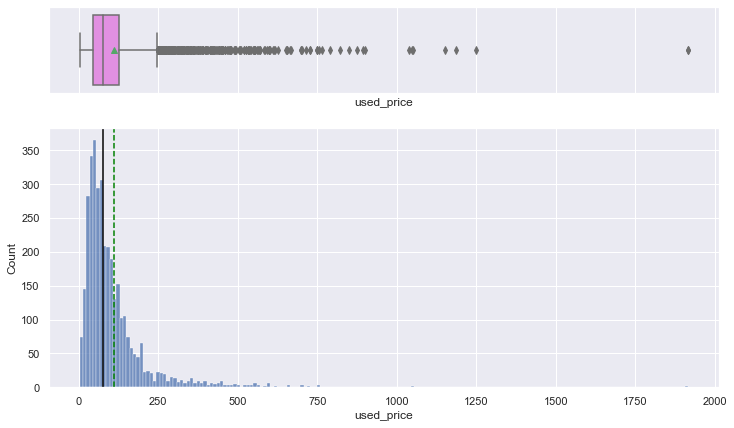

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "used_price")
# plt.savefig('out8.jpg',bbox_inches='tight')

- Used phone prices are highly right skewed
- The mean appears to be at the top of the 75th percentile while the median is more representative of the middle
- Most of the used phones cost less than $250
- How does this compare with new phone prices?

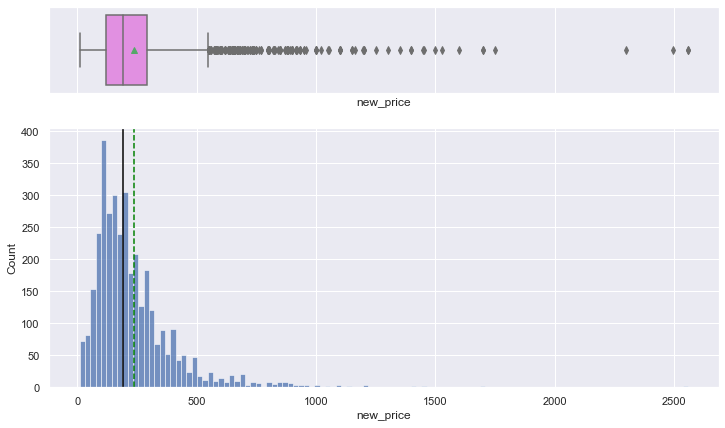

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "new_price")

- The new price distribution is matching the used price distribution
- My opinion is that they should, so this is good
- Seems to have a couple of very high prices for both new and used but knowing cell phones this is possible

In [24]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=13,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


# plt.show()  # show the plot

<IPython.core.display.Javascript object>

2. What percentage of the used phone market is dominated by Android devices?

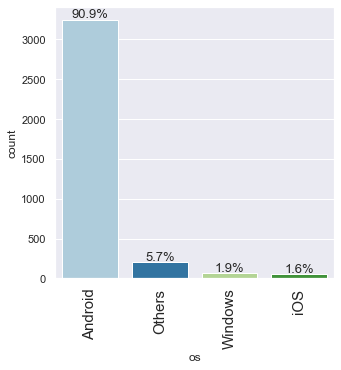

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "os", perc=True)
plt.savefig("os.jpg", bbox_inches="tight")

- Wow!! 90.9% of the used phone market is Android
- Surprisingly iOS is only 1.6%

<Figure size 1728x720 with 0 Axes>

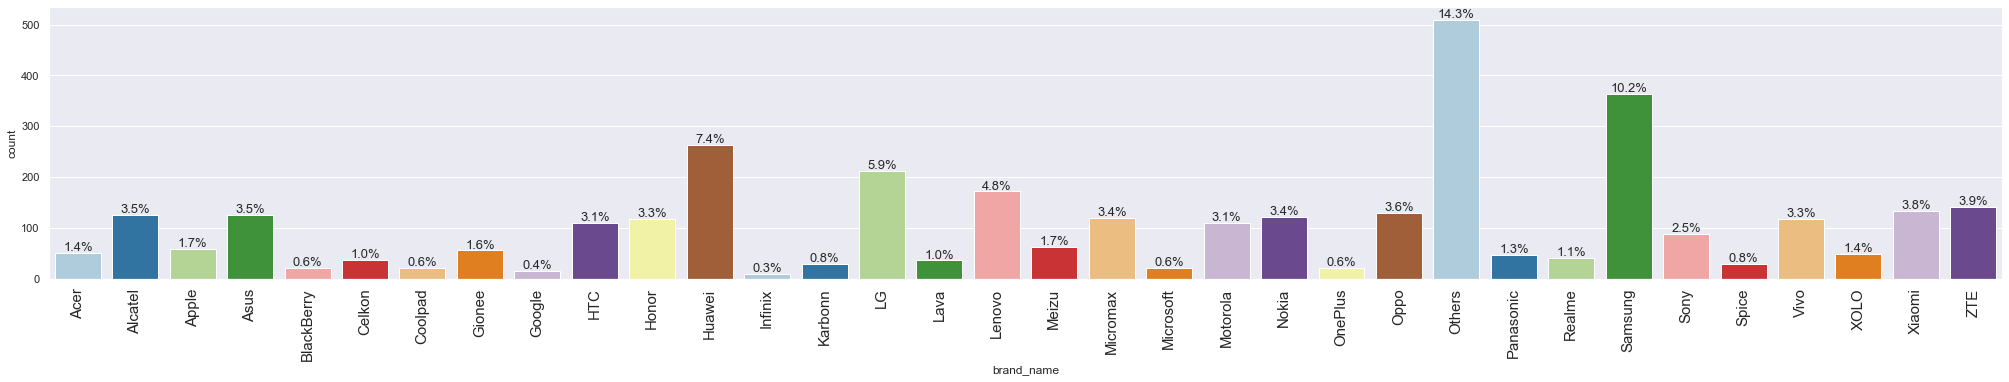

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(24, 10))
labeled_barplot(df, "brand_name", perc=True)
plt.savefig("brand.jpg", bbox_inches="tight")
plt.show()

- Samsung and others are the highest percentage of brand names
- With 34 unique brands the rest are between 7 and 0.3 percent

3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?

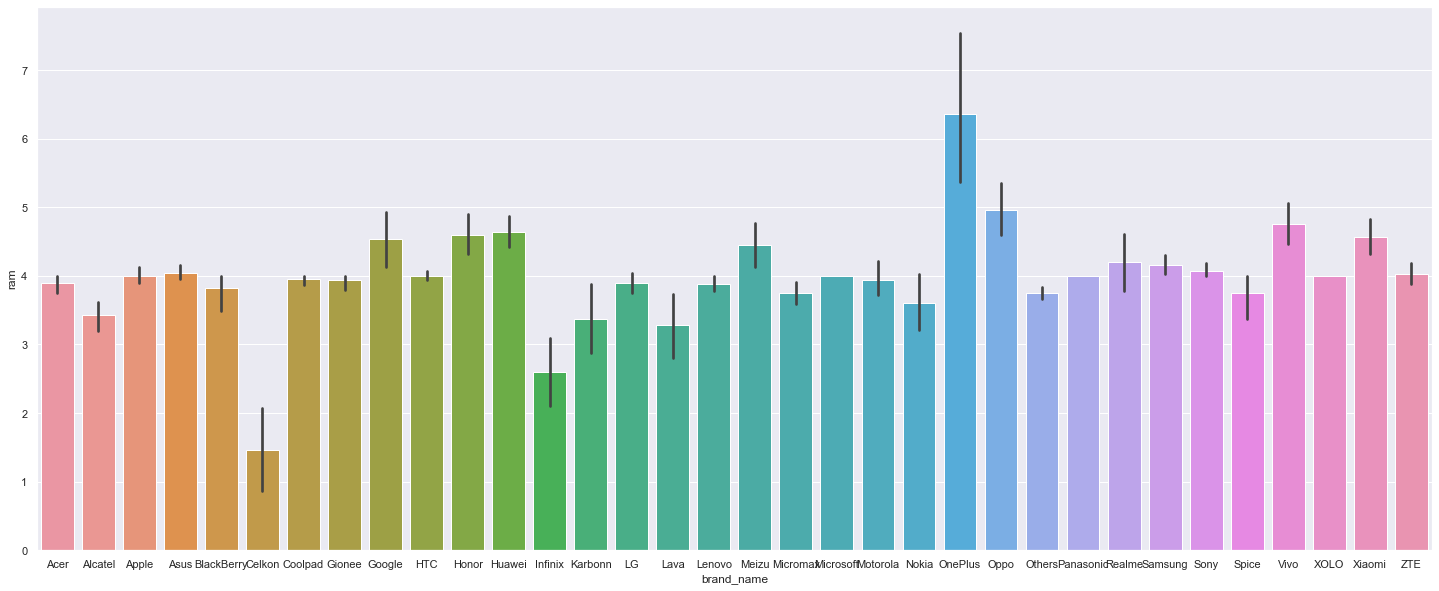

<IPython.core.display.Javascript object>

In [27]:
# Plot brand name vs ram
plt.figure(figsize=(25, 10))
sns.barplot(
    x=df["brand_name"], y=df["ram"],
)
# plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- OnePlus has the highest ram
- Celkon and Infinix have the lowest Ram
- The rest of the brands are fairly comparable, hovering between 3-4 ram

4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. 
How does the weight vary for phones offering large batteries (more than 4500 mAh)?

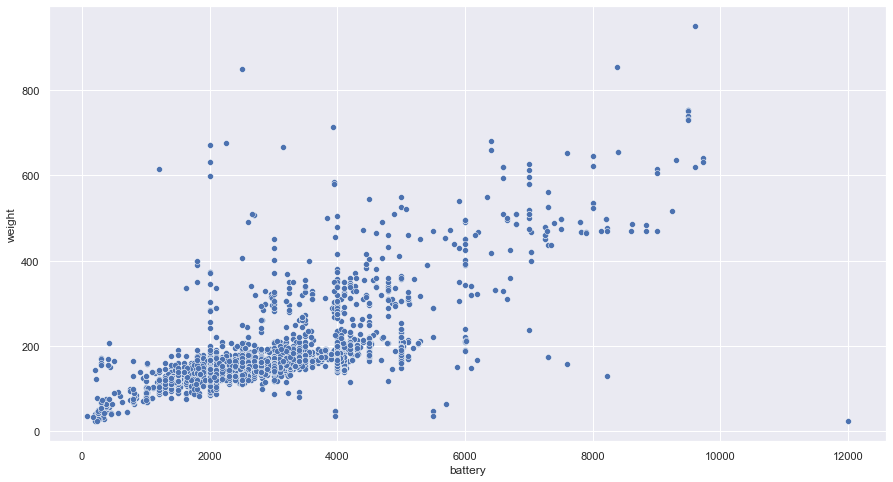

<IPython.core.display.Javascript object>

In [28]:
# Plot battery versus weight
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df["battery"], y=df["weight"], ci=0.0, palette="Dark2")
plt.show()

- It does appear there is some correlation between higher battery and higher weight
- Though the higher battery values show some scatter, especially after 200 on weight

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. 
How many phones are available across different brands with a screen size larger than 6 inches?

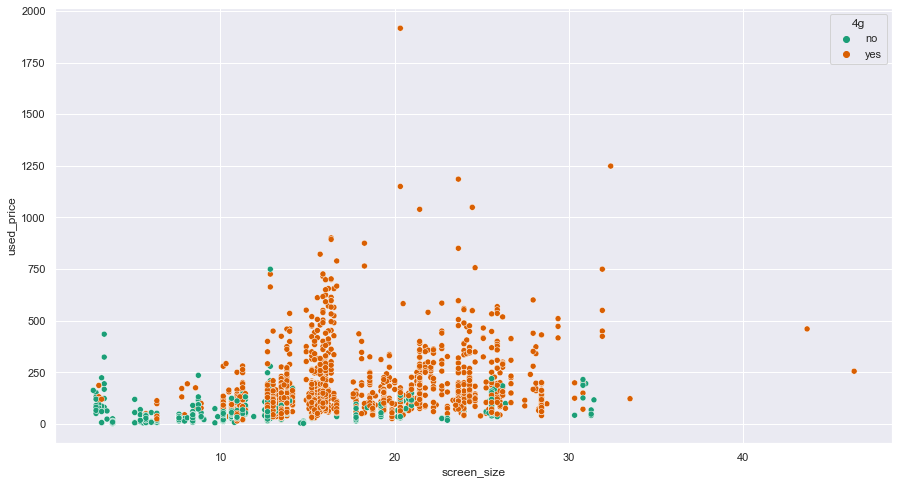

<IPython.core.display.Javascript object>

In [29]:
# Plot screen size versus used price
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x=df["screen_size"], y=df["used_price"], hue=df["4g"], ci=0.0, palette="Dark2"
)
plt.show()

- Seeing that the higher priced phones have 4g and perhaps screen size...hard to tell

In [30]:
# Get data with screen sizes greater than 6.0
screen6 = df.loc[df["screen_size"] > 6.0]
print(screen6)
screen6.head()

     brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        23.97  yes   no            13.0   
1         Honor  Android        28.10  yes  yes            13.0   
2         Honor  Android        24.29  yes  yes            13.0   
3         Honor  Android        26.04  yes  yes            13.0   
4         Honor  Android        15.72  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3566       Asus  Android        15.88  yes   no             NaN   
3567       Asus  Android        15.24  yes   no            13.0   
3568    Alcatel  Android        18.73  yes   no            13.0   
3569    Alcatel  Android        18.73  yes   no            13.0   
3570    Alcatel  Android        13.49  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1                 16.0       128.0  8.0   4300.

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


<IPython.core.display.Javascript object>

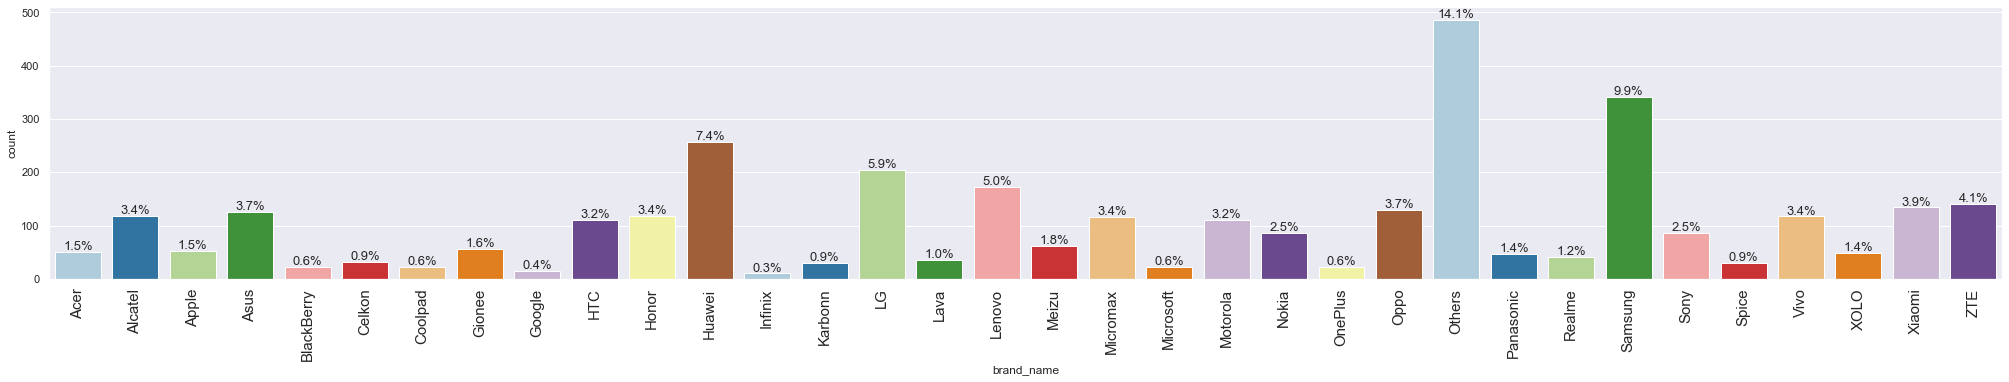

<IPython.core.display.Javascript object>

In [31]:
# Bar plot with brand name percentages
labeled_barplot(screen6, "brand_name", perc=True)

- Adding the screen size as larger then 6" didn't change the percentages much
- Seems like most phones are larger then 6"
- It only removed 120 phone and out of 3570 doesn't seem like a large amount to distribute over 34 brands

6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. 
What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

In [32]:
# Getting a subset of data with selfie cams bigger than 9
greater8 = df.loc[df["selfie_camera_mp"] > 8.0]
print(greater8)

     brand_name       os  screen_size   4g   5g  main_camera_mp  \
1         Honor  Android        28.10  yes  yes            13.0   
8         Honor  Android        15.72  yes   no            13.0   
12        Honor  Android        24.29  yes  yes            13.0   
13        Honor   Others         8.73   no   no            13.0   
14        Honor  Android        15.72  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3555    Samsung  Android        15.88  yes   no            12.0   
3556    Samsung  Android        16.51  yes   no            12.0   
3557    Samsung  Android        15.72  yes   no            12.0   
3558    Samsung   Others         3.18  yes   no            12.0   
3565       Asus  Android        24.61  yes   no             NaN   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
1                 16.0       128.0   8.0   4300.0   213.0          2020   
8                 16.0       128.0   6.0   40

<IPython.core.display.Javascript object>

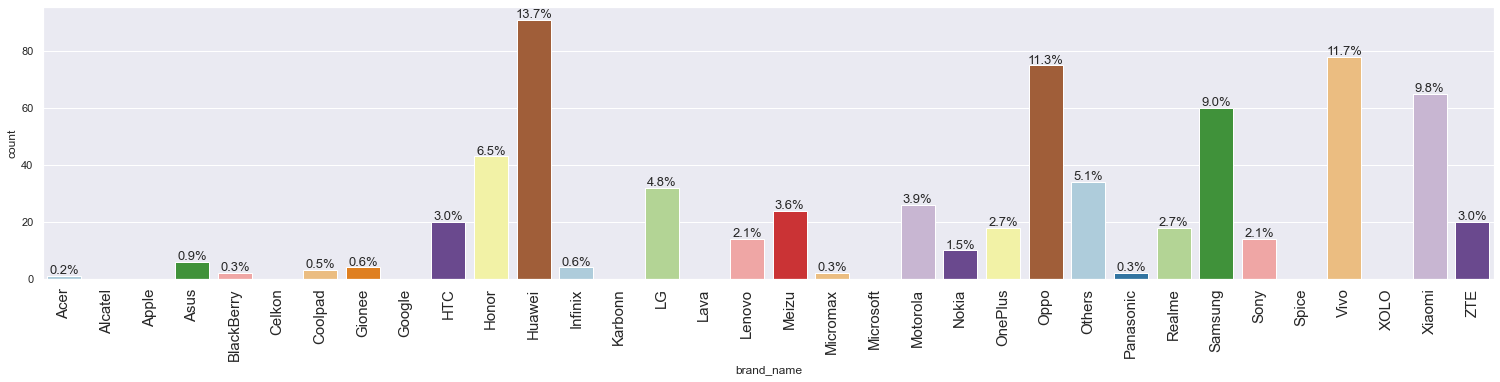

<IPython.core.display.Javascript object>

In [33]:
# Barplot with brandnames greater than 8 megapixels in selfie cam
labeled_barplot(greater8, "brand_name", perc=True)
# plt.savefig('brands.jpg',bbox_inches='tight')

- Selfie megapixes over 8 are only on 666 phones out of 3507, much more of a subset compared to screen size of 6"
- Huawei has the highest percentage of selfie megapixels at 13.7%
- This is closely followed by Oppo and Vivo at 11%, then Samsung and Xiaomi at 9%
- The rest of the brands are at or below 6.5%

7. Which attributes are highly correlated with the used phone price?

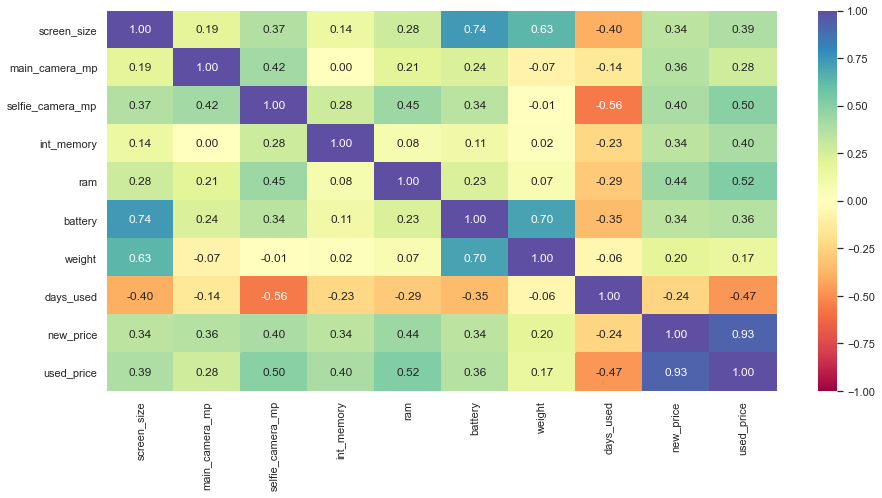

<IPython.core.display.Javascript object>

In [34]:
# Heat map to see correlations between numeric variables
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove(
    "release_year"
)  # dropping year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
plt.show()

- Highest correlation is used price and new price at 0.93 (positive)
- Ram, internal mem, selfie mp, and used price are positively correlated at 0.4 to 0.52
- Used price is negatively correlated at -0.47
- Weight with battery and screen size are both positively correlated 0.74 and 0.63 respectively
- Days used and selfie mp are negatively correlated at -0.56

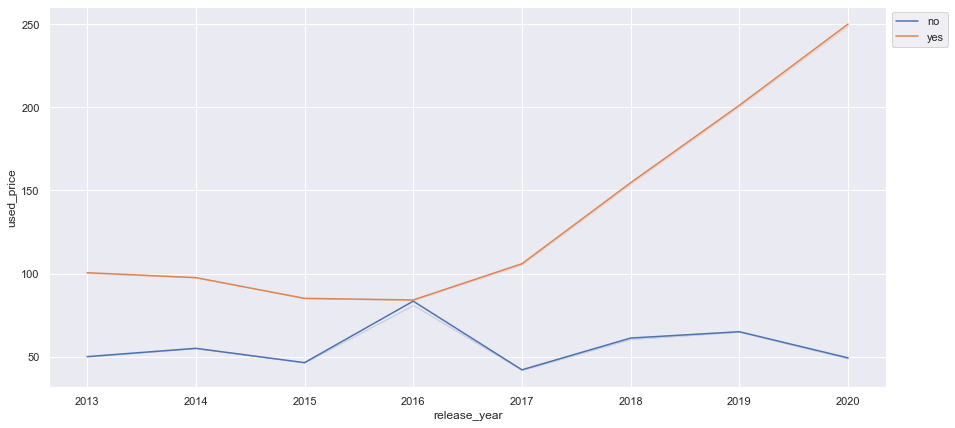

<IPython.core.display.Javascript object>

In [35]:
# Want to see by year the used price separated out by 4g
plt.figure(figsize=(15, 7))
sns.lineplot(x=df["release_year"], y=df["used_price"], hue=df["4g"], ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- used price goes up by year and takes off with phones having 4g
- without 4g phones peak in 2016 then decline on used price

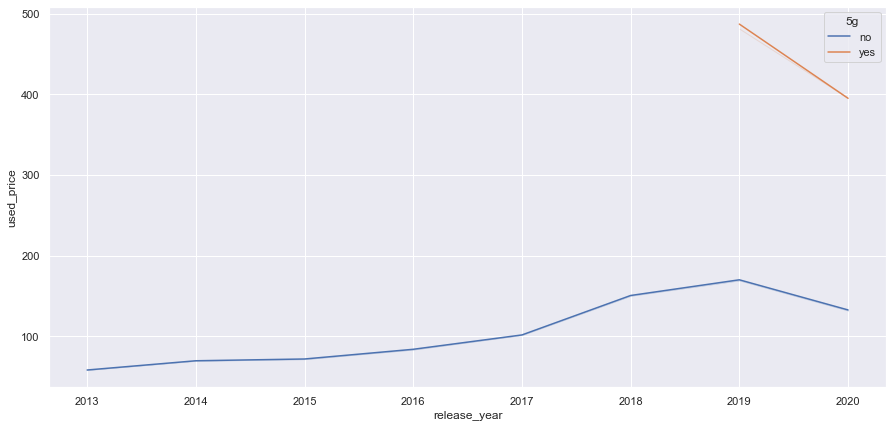

<IPython.core.display.Javascript object>

In [36]:
# Want to see by year the used price separated out by 5g
plt.figure(figsize=(15, 7))
sns.lineplot(x=df["release_year"], y=df["used_price"], hue=df["5g"], ci=0)
plt.show()

- No 5g phones steadily increase til 2019 then start declining
- 5g is in used phones starting in 2019 with a much higher price but seems to start going down in 2020 (need more data on 5g)

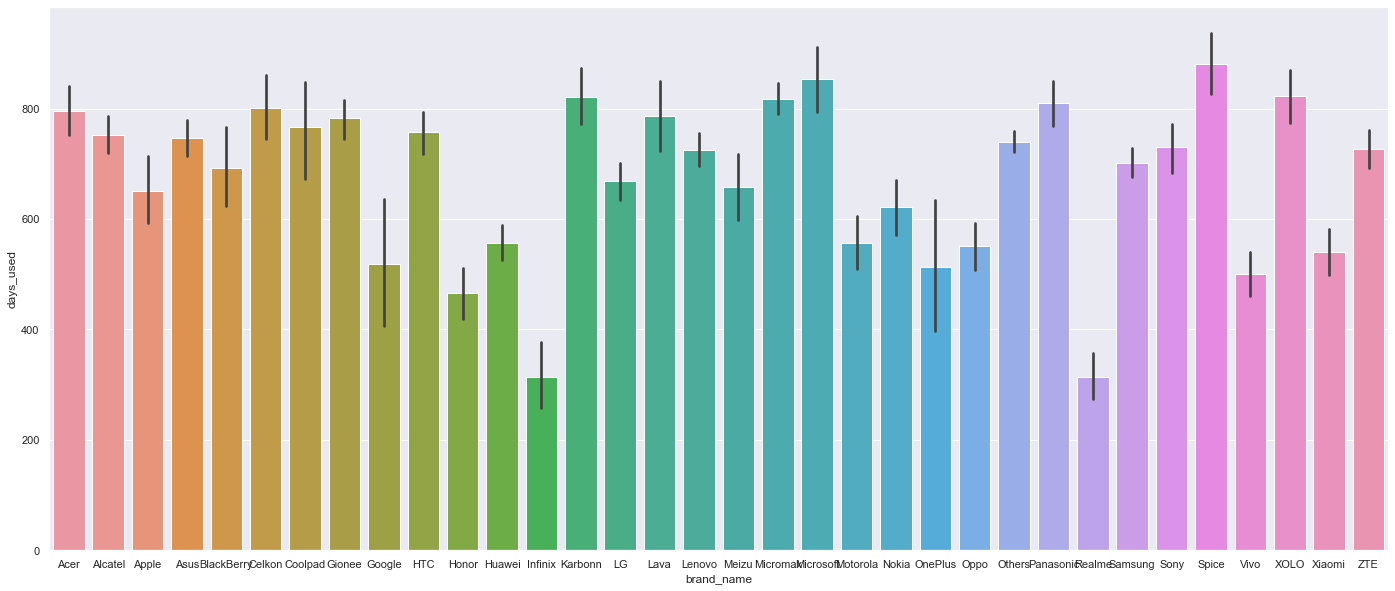

<IPython.core.display.Javascript object>

In [37]:
# Would like to see brand name versus days used
sns.set(rc={"figure.figsize": (15, 8)})
plt.figure(figsize=(24, 10))
sns.barplot(
    x=df["brand_name"], y=df["days_used"],
)
# plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Two brands that have low days used are Infinix and Realme
- Microsoft, Acer, Karbonn, Celkon, Panasonic, Spice, and Vivo have high usage in days used

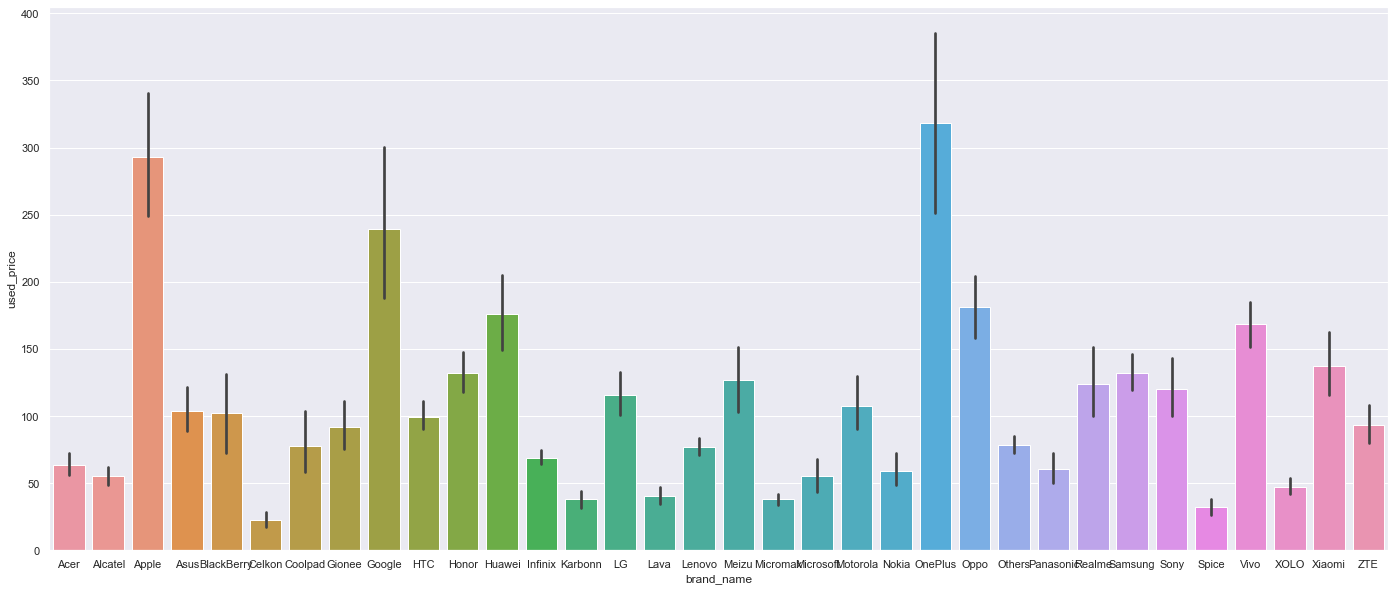

<IPython.core.display.Javascript object>

In [38]:
# Plot used brice and brand name
plt.figure(figsize=(24, 10))
sns.barplot(
    x=df["brand_name"], y=df["used_price"],
)
# plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Highest used price brands are Apple, OnePlus, and Google
- Lowest used prices are Celkon, Karbonn, Lava, Spice (some of these had high days used)

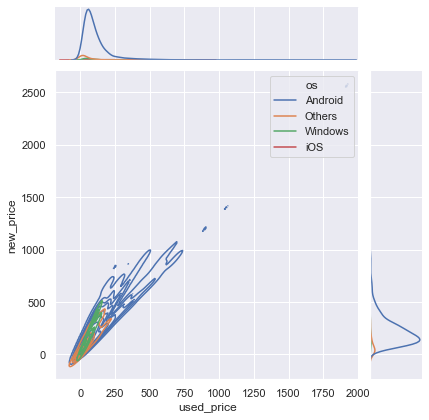

<IPython.core.display.Javascript object>

In [39]:
# Trying a joint plot between used price and new price
sns.jointplot(data=df, x="used_price", y="new_price", hue="os", kind="kde")

- Seems they are highly correlated (matches heat map)
- Android makes up most of the data

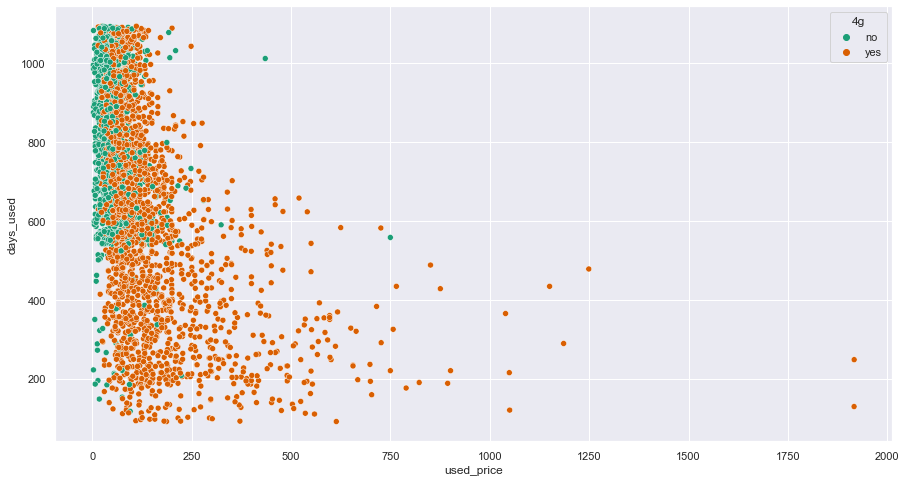

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x=df["used_price"], y=df["days_used"], hue=df["4g"], ci=0.0, palette="Dark2"
)
plt.savefig("days_price_4g.jpg", bbox_inches="tight")
plt.show()

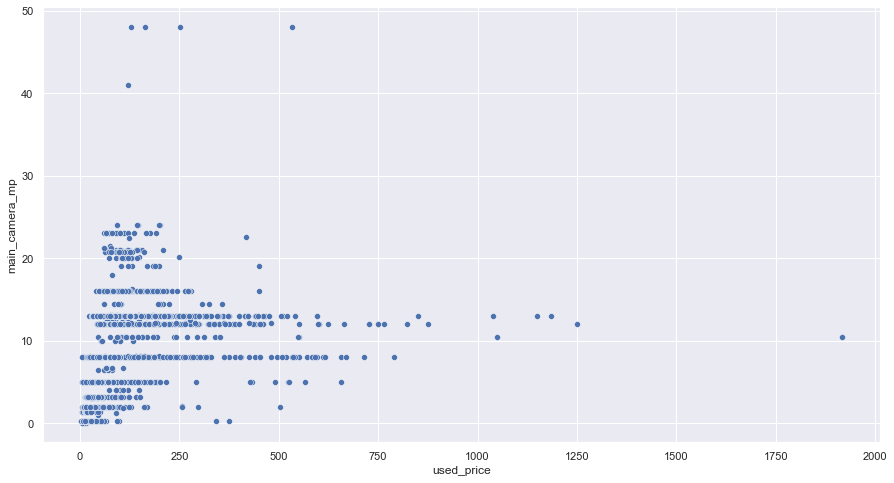

<IPython.core.display.Javascript object>

In [41]:
# Plot used price versus main camera megapixel
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x=df["used_price"], y=df["main_camera_mp"], ci=0.0, palette="Dark2",
)
plt.show()

- The highest megapixels are in the med to lower used prices

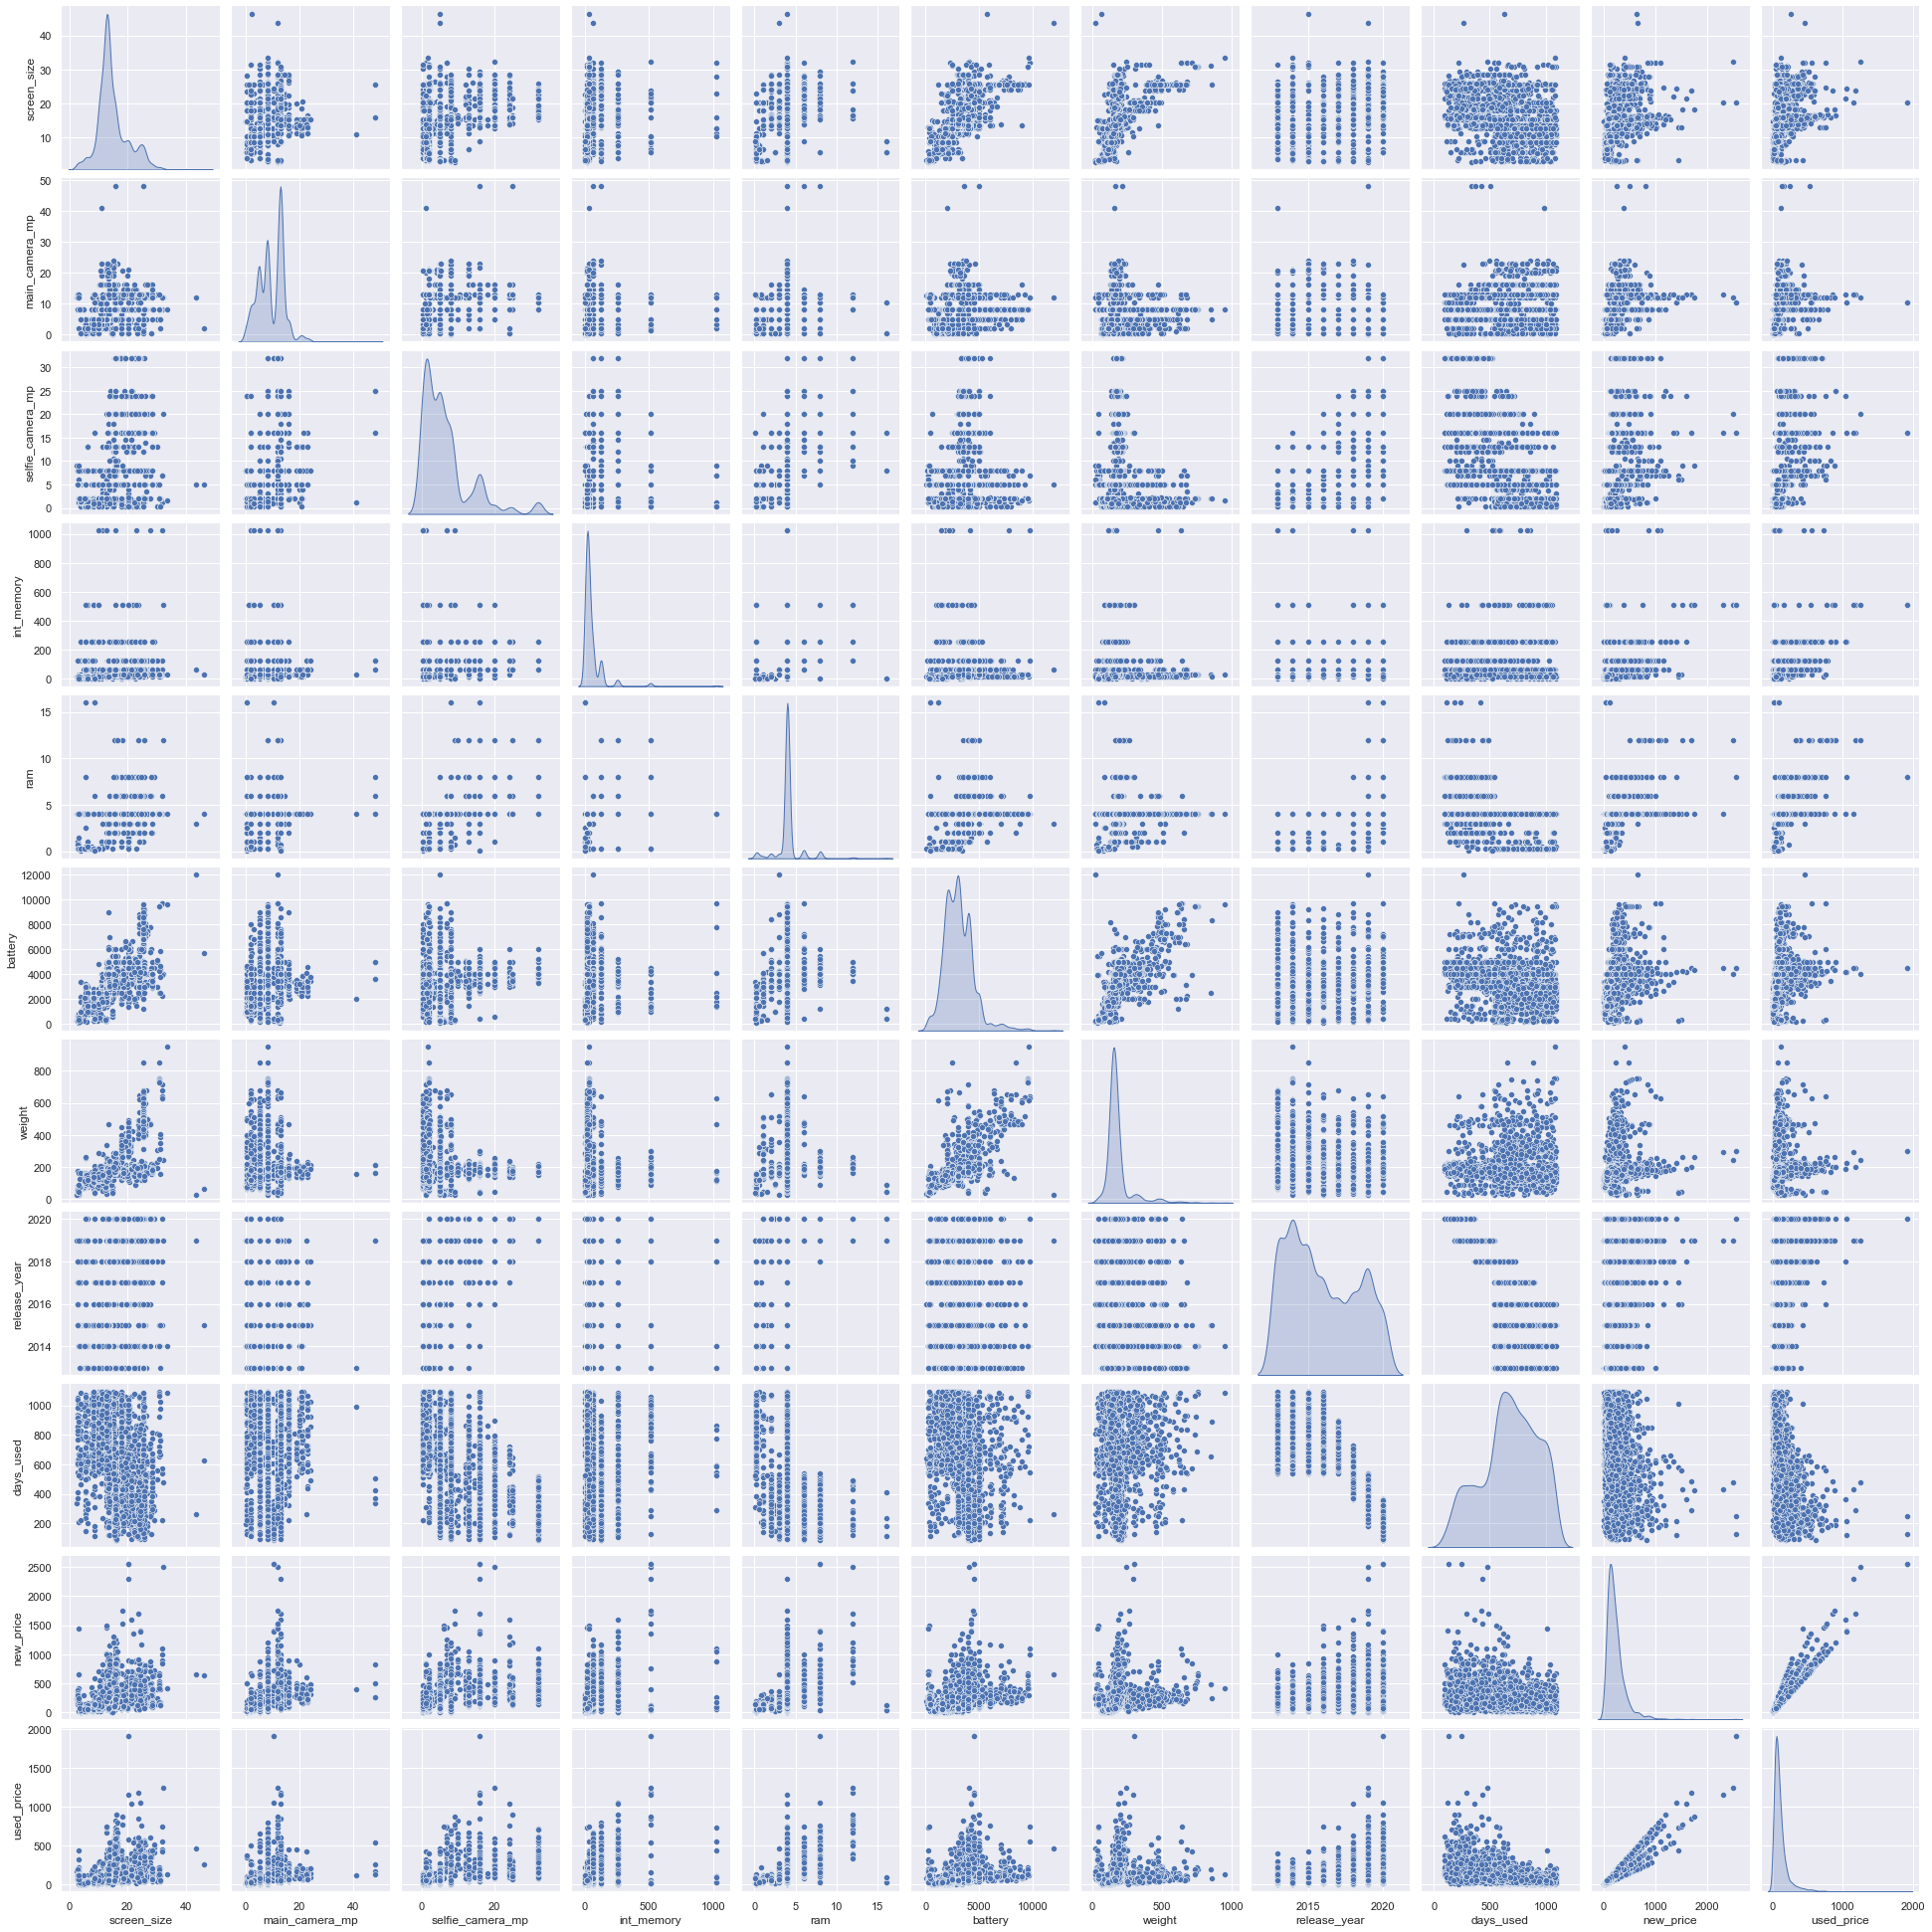

<IPython.core.display.Javascript object>

In [42]:
# Pairplot to look at distributions and scatterplots
sns.set(rc={"figure.figsize": (16, 9)})
sns.pairplot(df, diag_kind="kde")
plt.show()

- Variables all seem to have a right skew 
- Can see the correlations noticed in the heat map based on the higher ones (new/used price)

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

1. Missing value treatment

In [43]:
# Get counts of missing values
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    3368
1     193
2       8
3       2
dtype: int64

<IPython.core.display.Javascript object>

In [44]:
# these are missing int_memory and ram
df[num_missing == 2].sample(n=5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2147,Nokia,Others,3.18,no,no,2.0,2.0,NaN,NaN,800.0,69.8,2015,665,18.48,7.48
2142,Nokia,Others,6.35,no,no,2.0,2.0,NaN,NaN,1200.0,91.8,2015,867,68.01,20.46
2144,Nokia,Others,5.72,no,no,2.0,2.0,NaN,NaN,1100.0,79.0,2015,1012,41.92,12.52
2146,Nokia,Others,3.18,no,no,2.0,2.0,NaN,NaN,800.0,69.6,2015,1009,19.92,6.07
2143,Nokia,Others,6.35,no,no,2.0,2.0,NaN,NaN,1200.0,91.8,2015,772,69.94,28.06


<IPython.core.display.Javascript object>

In [45]:
# Sort missing values based on column, then compare the 2 or 3 to see if they are related
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NAs are found in:")
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n\n")

For the rows with exactly 1 missing values, NAs are found in:
main_camera_mp      180
selfie_camera_mp      2
battery               4
weight                7
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
int_memory    8
ram           8
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
int_memory    2
ram           2
battery       2
dtype: int64





<IPython.core.display.Javascript object>

# Boxplots of the variables with missing values to see how best to treat (mean, median, remove)

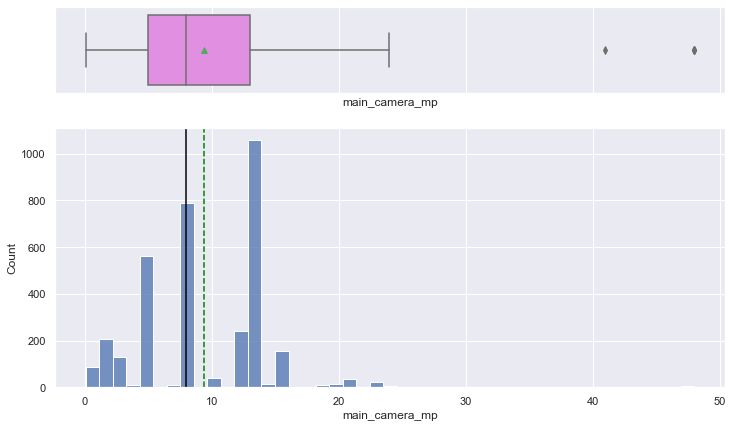

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(df, "main_camera_mp")

-Median or 
-Remove
-There are a lot of values 5% so median

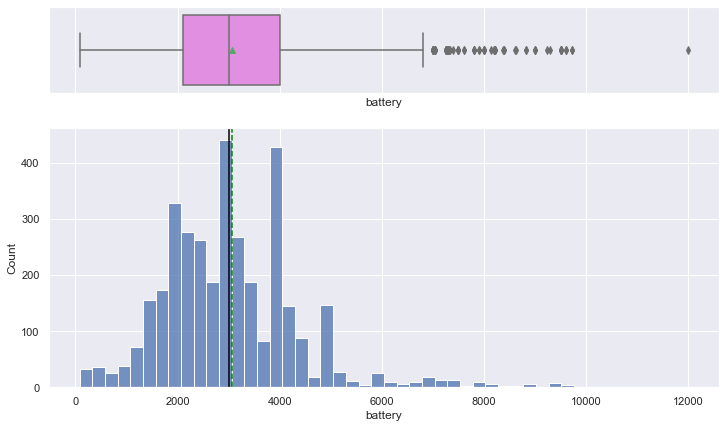

<IPython.core.display.Javascript object>

In [47]:
histogram_boxplot(df, "battery")

- Mean or median will work

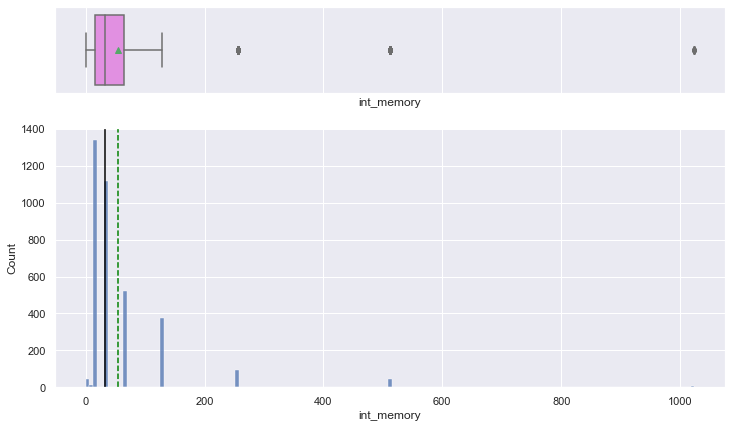

<IPython.core.display.Javascript object>

In [48]:
histogram_boxplot(df, "int_memory")

- Highest value

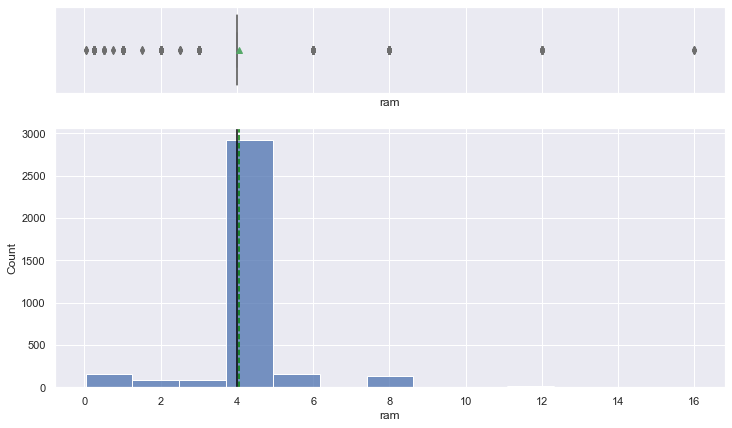

<IPython.core.display.Javascript object>

In [49]:
histogram_boxplot(df, "ram")

- highest value seems the best

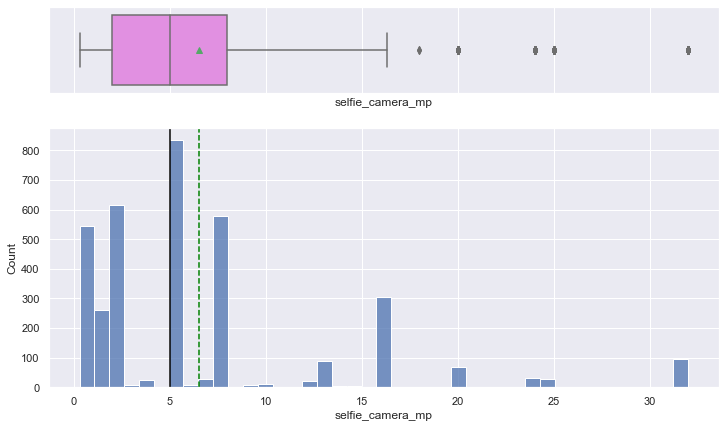

<IPython.core.display.Javascript object>

In [50]:
histogram_boxplot(df, "selfie_camera_mp")

- Median

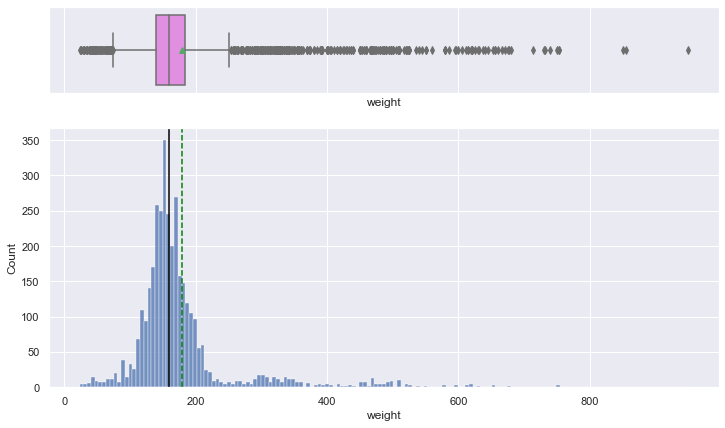

<IPython.core.display.Javascript object>

In [51]:
histogram_boxplot(df, "weight")

- Median

In [52]:
# now using `fillna` with a numeric column to fill values with mean, median with verifying they are treated
print(df["battery"].isnull().sum())
df["battery"].fillna(df["battery"].mean(), inplace=True)  # mean imputation
df["battery"].isnull().sum()

6


0

<IPython.core.display.Javascript object>

In [53]:
print(df["ram"].isnull().sum())
df["ram"].fillna(
    df["ram"].value_counts().index[0], inplace=True
)  # highest values imputation
df["ram"].isnull().sum()

10


0

<IPython.core.display.Javascript object>

In [54]:
print(df["int_memory"].isnull().sum())
df["int_memory"].fillna(
    df["int_memory"].value_counts().index[0], inplace=True
)  # highest values imputation
df["int_memory"].isnull().sum()

10


0

<IPython.core.display.Javascript object>

In [55]:
# now using `fillna` with a numeric column
print(df["weight"].isnull().sum())
df["weight"].fillna(df["weight"].median(), inplace=True)  # median imputation
df["weight"].isnull().sum()

7


0

<IPython.core.display.Javascript object>

In [56]:
# now using `fillna` with a numeric column
print(df["selfie_camera_mp"].isnull().sum())
df["selfie_camera_mp"].fillna(
    df["selfie_camera_mp"].median(), inplace=True  # median imputation
)  # mean imputation
df["selfie_camera_mp"].isnull().sum()

2


0

<IPython.core.display.Javascript object>

In [57]:
# What's the percentage of 180 values to help decide to remove or replace
# Note I did try to remove but it removed and entire brand Inifinix so did replacement instead
180 / 3571

0.0504060487258471

<IPython.core.display.Javascript object>

In [58]:
print(df["main_camera_mp"].isnull().sum())
# df = df.dropna(subset=["main_camera_mp"], how="all")
df["main_camera_mp"].fillna(
    df["main_camera_mp"].median(), inplace=True  # median imputation
)  # median imputation
df["main_camera_mp"].isnull().sum()

180


0

<IPython.core.display.Javascript object>

In [59]:
# Verify all missing values are gone
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    3571
dtype: int64

<IPython.core.display.Javascript object>

2. Feature engineering (if needed)

# Need to bin the brands, will do it by average used price


In [60]:
# Check averages of each brand of phone to bin
brands = df.groupby(by=["brand_name"])["used_price"].mean().to_frame().reset_index()
brands.sort_values(by="used_price")

,brand_name,used_price
5,Celkon,22.648378
29,Spice,32.299667
13,Karbonn,38.069333
18,Micromax,38.134417
15,Lava,40.112778
31,XOLO,47.340204
19,Microsoft,55.316818
1,Alcatel,55.326080
21,Nokia,59.393719
25,Panasonic,60.302979


<IPython.core.display.Javascript object>

In [61]:
# create a column for the bins called bucket, cut into low, med, and high values...want them evenly distributed
brands["bucket"] = pd.cut(
    brands["used_price"], bins=[0, 75, 120, 320], labels=["Low", "Med", "High"]
)
print(brands)

    brand_name  used_price bucket
0         Acer   63.798431    Low
1      Alcatel   55.326080    Low
2        Apple  293.228814   High
3         Asus  103.764921    Med
4   BlackBerry  102.039091    Med
5       Celkon   22.648378    Low
6      Coolpad   77.928182    Med
7       Gionee   91.881964    Med
8       Google  239.211333   High
9          HTC   99.626000    Med
10       Honor  132.285932   High
11      Huawei  176.256894   High
12     Infinix   68.979000    Low
13     Karbonn   38.069333    Low
14          LG  115.853726    Med
15        Lava   40.112778    Low
16      Lenovo   77.147500    Med
17       Meizu  126.515484   High
18    Micromax   38.134417    Low
19   Microsoft   55.316818    Low
20    Motorola  107.695636    Med
21       Nokia   59.393719    Low
22     OnePlus  318.515909   High
23        Oppo  180.845271   High
24      Others   78.492102    Med
25   Panasonic   60.302979    Low
26      Realme  124.169024   High
27     Samsung  132.083462   High
28        Sony

<IPython.core.display.Javascript object>

In [62]:
# Now drop used price so just brand name and bucket, will use this to make a dictionary
brands = brands.drop(["used_price"], axis=1)
print(brands)

    brand_name bucket
0         Acer    Low
1      Alcatel    Low
2        Apple   High
3         Asus    Med
4   BlackBerry    Med
5       Celkon    Low
6      Coolpad    Med
7       Gionee    Med
8       Google   High
9          HTC    Med
10       Honor   High
11      Huawei   High
12     Infinix    Low
13     Karbonn    Low
14          LG    Med
15        Lava    Low
16      Lenovo    Med
17       Meizu   High
18    Micromax    Low
19   Microsoft    Low
20    Motorola    Med
21       Nokia    Low
22     OnePlus   High
23        Oppo   High
24      Others    Med
25   Panasonic    Low
26      Realme   High
27     Samsung   High
28        Sony    Med
29       Spice    Low
30        Vivo   High
31        XOLO    Low
32      Xiaomi   High
33         ZTE    Med


<IPython.core.display.Javascript object>

In [63]:
# https://cmdlinetips.com/2021/04/convert-two-column-values-from-pandas-dataframe-to-a-dictionary/
# From Python and R Tips how to convert 2 columns in a dataframe to a dictionary...need this done without the index
zip(brands.brand_name, brands.bucket)
type(zip(brands.brand_name, brands.bucket))
list(zip(brands.brand_name, brands.bucket))
bucket = dict(zip(brands.brand_name, brands.bucket))

<IPython.core.display.Javascript object>

In [64]:
# Verify the dictionary is good to go
print(bucket)

{'Acer': 'Low', 'Alcatel': 'Low', 'Apple': 'High', 'Asus': 'Med', 'BlackBerry': 'Med', 'Celkon': 'Low', 'Coolpad': 'Med', 'Gionee': 'Med', 'Google': 'High', 'HTC': 'Med', 'Honor': 'High', 'Huawei': 'High', 'Infinix': 'Low', 'Karbonn': 'Low', 'LG': 'Med', 'Lava': 'Low', 'Lenovo': 'Med', 'Meizu': 'High', 'Micromax': 'Low', 'Microsoft': 'Low', 'Motorola': 'Med', 'Nokia': 'Low', 'OnePlus': 'High', 'Oppo': 'High', 'Others': 'Med', 'Panasonic': 'Low', 'Realme': 'High', 'Samsung': 'High', 'Sony': 'Med', 'Spice': 'Low', 'Vivo': 'High', 'XOLO': 'Low', 'Xiaomi': 'High', 'ZTE': 'Med'}


<IPython.core.display.Javascript object>

In [65]:
# Now replace the brand names with the correct bucket value
df["brand_name"] = df["brand_name"].replace(bucket)
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,High,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,High,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,High,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,High,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,High,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


<IPython.core.display.Javascript object>

In [66]:
# Check it randomly
df.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2844,Med,Android,25.56,yes,no,8.1,2.2,16.0,4.0,6000.0,439.0,2014,626,350.70,140.20
310,Med,Android,15.88,yes,yes,8.0,32.0,256.0,8.0,4000.0,192.0,2019,471,1100.31,550.27
847,Med,Android,17.78,yes,no,5.0,1.2,16.0,4.0,3950.0,290.0,2013,1083,231.01,69.20
401,High,Others,31.91,yes,no,12.0,7.0,128.0,6.0,9720.0,641.0,2020,220,999.58,749.84
75,Med,Android,15.72,yes,no,8.0,16.0,64.0,4.0,4050.0,164.0,2019,482,157.98,78.79
1755,Med,Android,13.81,yes,no,13.0,5.0,16.0,4.0,3000.0,169.8,2015,599,190.96,95.37
2495,High,Android,20.32,yes,no,8.0,5.0,16.0,4.0,4450.0,415.0,2017,886,389.75,116.90
2751,High,Others,10.80,no,no,5.0,1.3,16.0,4.0,800.0,130.4,2013,778,20.62,8.30
439,Low,Android,13.49,yes,no,13.0,5.0,32.0,4.0,4080.0,169.0,2016,1079,251.35,75.58
288,Low,Android,16.19,yes,no,8.0,16.0,32.0,3.0,4000.0,178.0,2019,356,100.08,63.94


<IPython.core.display.Javascript object>

In [67]:
# Now that it's altered put it as a category again versus an object
df["brand_name"] = df["brand_name"].astype("category")

<IPython.core.display.Javascript object>

### Outlier Detection

- Let's look at outliers in every numerical column

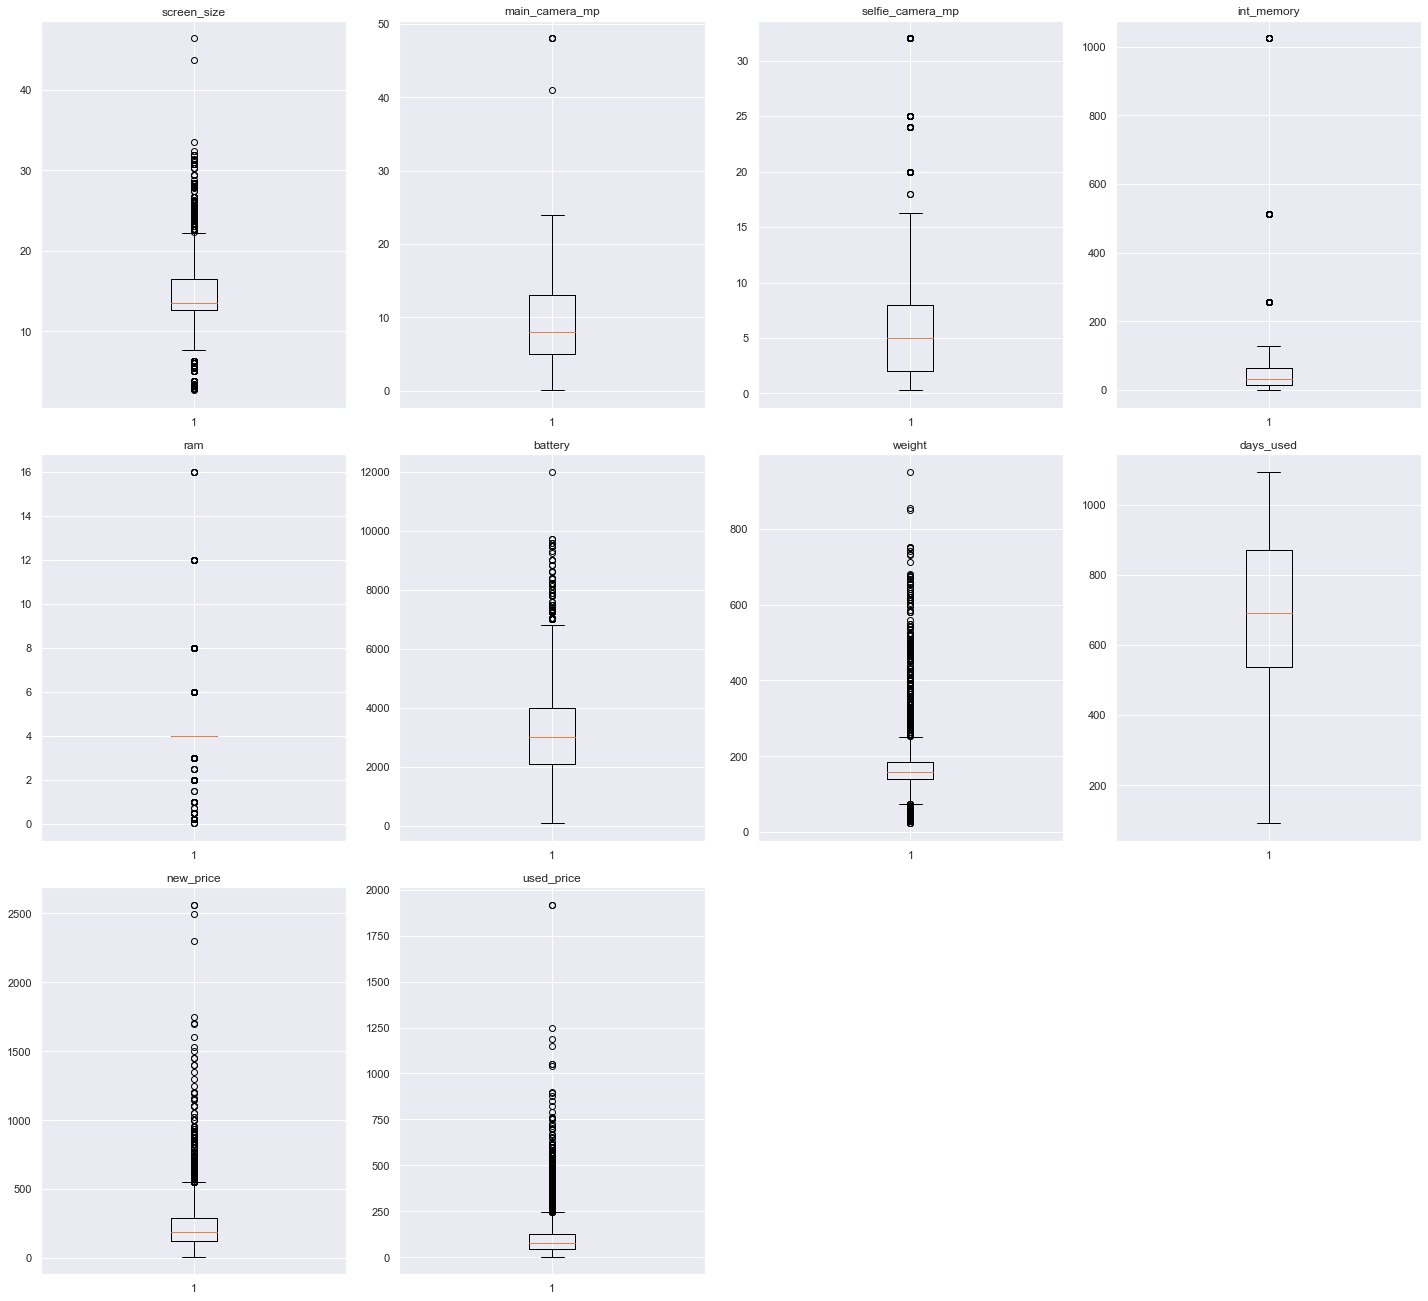

<IPython.core.display.Javascript object>

In [68]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Definitely don't want to treat ram...the whole dataset would be gone plus they aren't outliers, in my opinion it's more of a categorical variable but for the model will need it as a number
- Don't want to treat new and used prices, these higher prices will be valuable in what we are trying to predict
- Looking at all the parameters, I only feel comfortable treating main camera mp and int mem... in phones these values outside of the quartiles are still in the realm of phones

In [69]:
# Functions to identify and treat outliers from course content (MLS)
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [70]:
# treating the outliers
df_out_treat = treat_outliers(df, "main_camera_mp")
df_out_treat = treat_outliers(df, "int_memory")

<IPython.core.display.Javascript object>

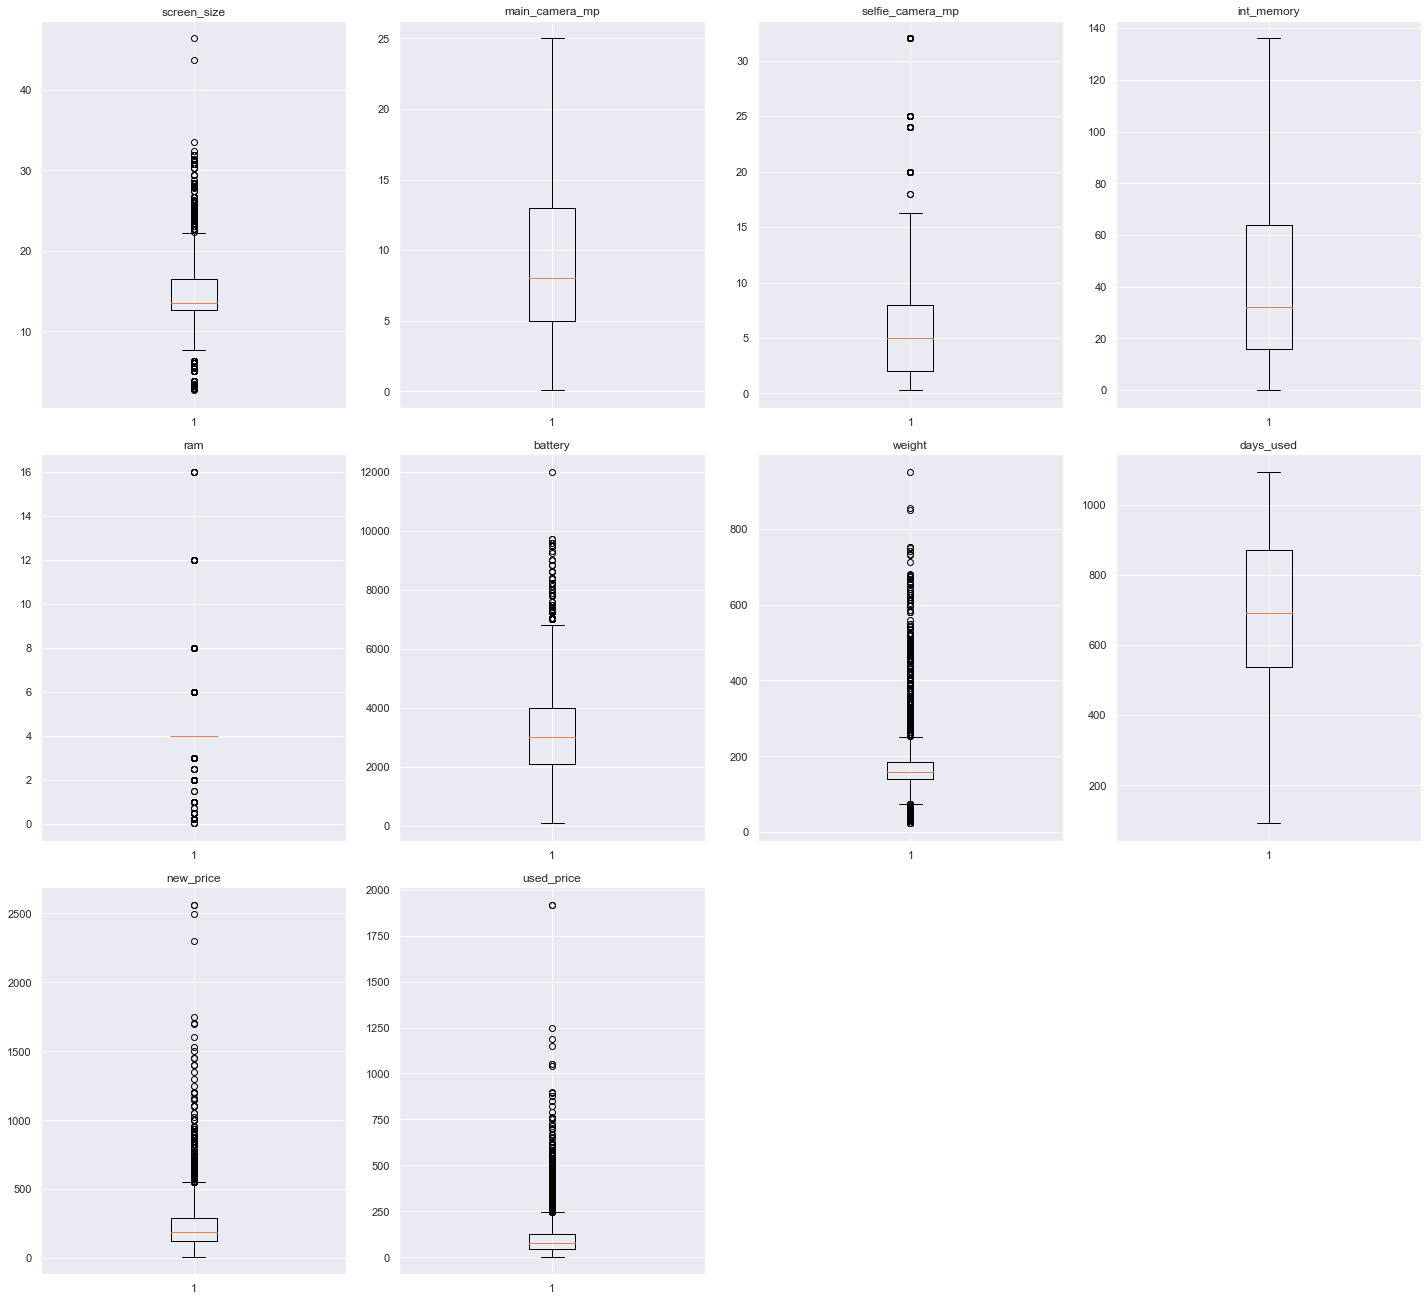

<IPython.core.display.Javascript object>

In [71]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Main camera mg and int memory definitely look better
- I would like to treat new/used prices but only on the few very high values 

In [72]:
# quartiles = np.quantile(
#    df_out_treat["new_price"][df_out_treat["new_price"].notnull()], [0.25, 0.75]
# )
# new_4iqr = 4 * (quartiles[1] - quartiles[0])
# print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {new_4iqr}")
# outlier_new = df.loc[
#    np.abs(df_out_treat["new_price"] - df_out_treat["new_price"].median()) > new_4iqr,
#    "new_price",
# ]
# outlier_new

<IPython.core.display.Javascript object>

In [73]:
# if we wanted to make these NA we could just do this
# [not run]
# df_out_treat.loc[
#    np.abs(df_out_treat["new_price"] - df_out_treat["new_price"].median()) > new_4iqr,
#    "new_price",
# ] = np.nan

<IPython.core.display.Javascript object>

In [74]:
# dropping these rows
# [not run]
# df_out_treat.drop(outlier_new.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [75]:
# let's look at the boxplots to see if the outliers have been treated or not
# plt.figure(figsize=(20, 30))

# for i, variable in enumerate(numeric_columns):
#    plt.subplot(5, 4, i + 1)
#    plt.boxplot(df_out_treat[variable], whis=1.5)
#    plt.tight_layout()
#    plt.title(variable)

# plt.show()

<IPython.core.display.Javascript object>

# I tried cleaning up the used and new prices very high data point(s) using the method below...I did it after full model run
- Removing even the extreme outlier points made the model run worse from .945 to .92 and .941 and it changed which variables affected the model...I decided to add the extreme points back in

## EDA

- It is a good idea to explore the data once again after manipulating it.

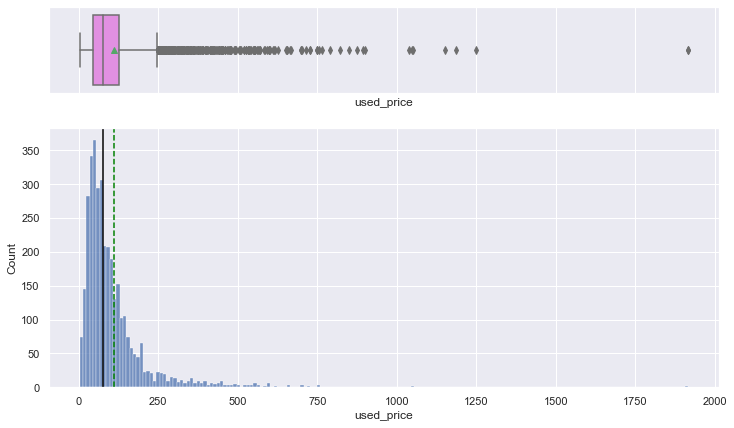

<IPython.core.display.Javascript object>

In [76]:
# No change to these now, they looked a bit less skewed after outlier treatment but returned it back based on model performance
histogram_boxplot(df_out_treat, "used_price")
plt.savefig("used_price.jpg", bbox_inches="tight")

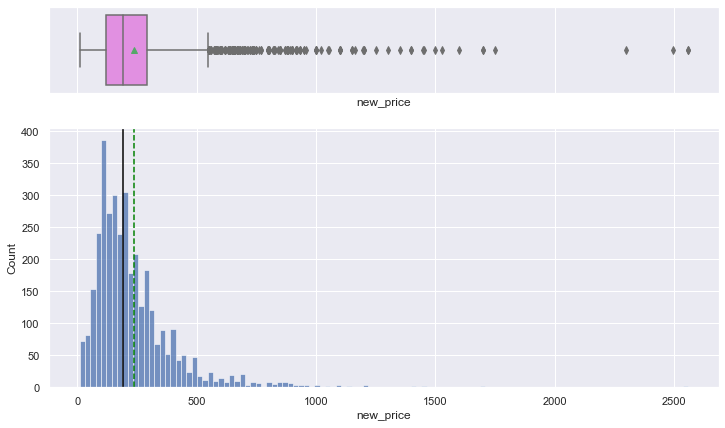

<IPython.core.display.Javascript object>

In [77]:
# No change to these now, they looked a bit less skewed after outlier treatment but returned it back based on model performance
histogram_boxplot(df_out_treat, "new_price")
plt.savefig("new_price.jpg", bbox_inches="tight")

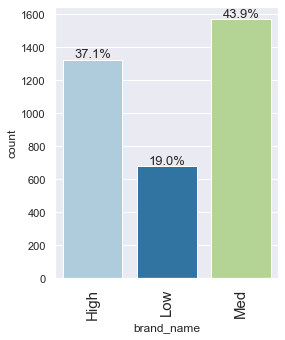

<IPython.core.display.Javascript object>

In [78]:
# Much easier to see versus spread out between 34 values
labeled_barplot(df_out_treat, "brand_name", perc=True)
plt.savefig("bucket_percent.jpg", bbox_inches="tight")

- Most of the data points are in the med bucket (almost half)
- Then phones in the high bucket
- Followed by low bucket phones

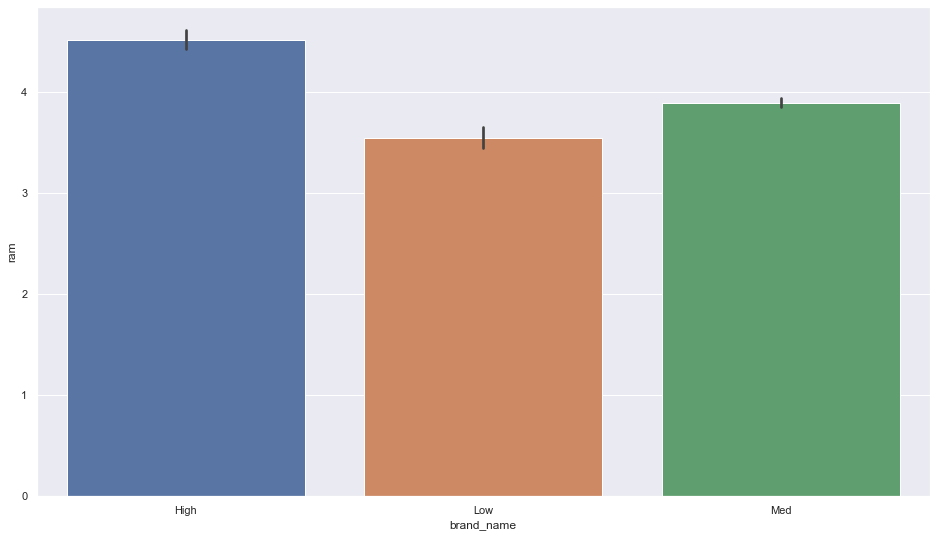

<IPython.core.display.Javascript object>

In [79]:
#Much easier to see versus spread out between 34 values
#plt.figure(figsize=(22, 10))
sns.barplot(
    x=df_out_treat["brand_name"], y=df["ram"],
)
# plt.legend(bbox_to_anchor=(1.00, 1))
plt.savefig('bucket_ram.jpg',bbox_inches='tight')
plt.show()


- High value phones have higher ram

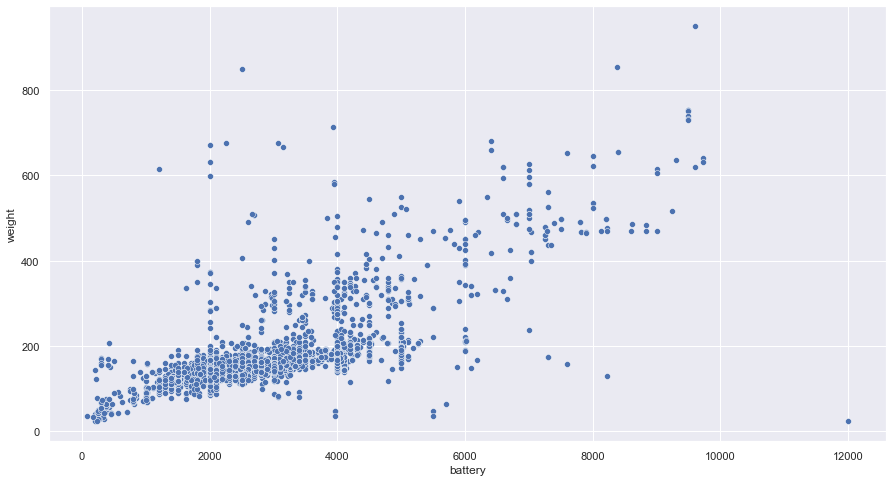

<IPython.core.display.Javascript object>

In [80]:
# No change here
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x=df_out_treat["battery"], y=df_out_treat["weight"], ci=0.0, palette="Dark2"
)
plt.show()

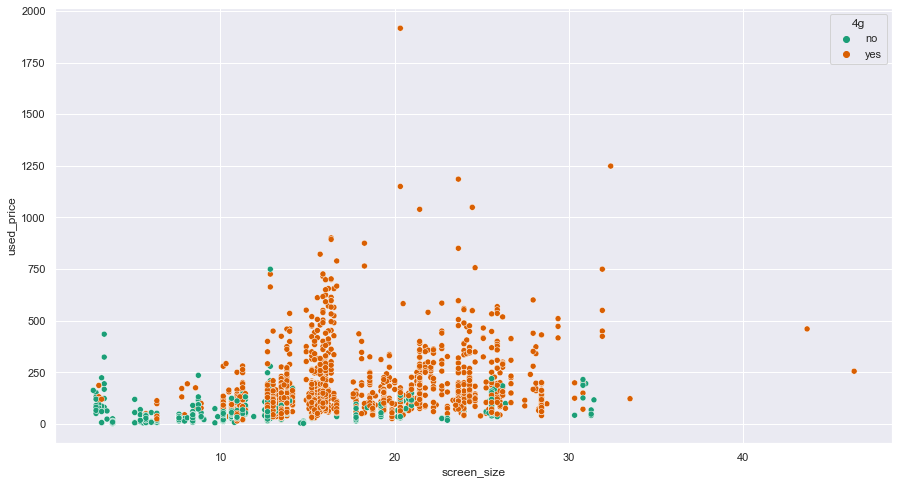

<IPython.core.display.Javascript object>

In [81]:
#No change here
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x=df_out_treat["screen_size"], y=df_out_treat["used_price"], hue=df_out_treat["4g"], ci=0.0, palette="Dark2"
)
plt.show()


     brand_name       os  screen_size   4g   5g  main_camera_mp  \
0          High  Android        23.97  yes   no            13.0   
1          High  Android        28.10  yes  yes            13.0   
2          High  Android        24.29  yes  yes            13.0   
3          High  Android        26.04  yes  yes            13.0   
4          High  Android        15.72  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3566        Med  Android        15.88  yes   no             8.0   
3567        Med  Android        15.24  yes   no            13.0   
3568        Low  Android        18.73  yes   no            13.0   
3569        Low  Android        18.73  yes   no            13.0   
3570        Low  Android        13.49  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1                 16.0       128.0  8.0   4300.

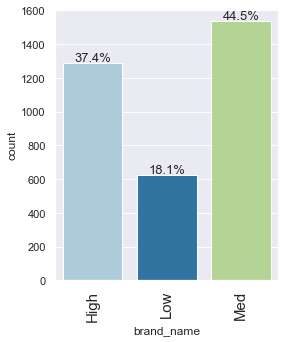

<IPython.core.display.Javascript object>

In [82]:
# Much easier to see versus spread out between 34 values
screen6 = df_out_treat.loc[df_out_treat["screen_size"] > 6.0]
print(screen6)
screen6.head()
labeled_barplot(screen6, "brand_name", perc=True)

- With subset of 6" screen, most phones are medium bucket
- Lowest amount is low bucket out of the subset

     brand_name       os  screen_size   4g   5g  main_camera_mp  \
1          High  Android        28.10  yes  yes            13.0   
8          High  Android        15.72  yes   no            13.0   
12         High  Android        24.29  yes  yes            13.0   
13         High   Others         8.73   no   no            13.0   
14         High  Android        15.72  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3555       High  Android        15.88  yes   no            12.0   
3556       High  Android        16.51  yes   no            12.0   
3557       High  Android        15.72  yes   no            12.0   
3558       High   Others         3.18  yes   no            12.0   
3565        Med  Android        24.61  yes   no             8.0   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
1                 16.0       128.0   8.0   4300.0   213.0          2020   
8                 16.0       128.0   6.0   40

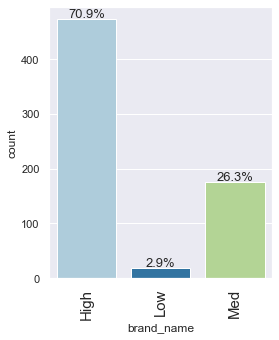

<IPython.core.display.Javascript object>

In [83]:
# Much easier to see versus spread out between 34 values
greater8 = df_out_treat.loc[df_out_treat["selfie_camera_mp"] > 8.0]
print(greater8)
# sns.displot(df, x="brand_name", bins=20)
labeled_barplot(greater8, "brand_name", perc=True)
plt.savefig("bucket_8mp_selfie.jpg", bbox_inches="tight")
plt.show()

- With phones >8 selfie mp they are 70.9% high bucket phones
- Hardly any in the low bucket (2.9%)
- And a few phones in the medium bucket (26.3%)

In [84]:
numeric_columns = df_out_treat.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove(
    "release_year"
)  # dropping year column as it is temporal variable

<IPython.core.display.Javascript object>

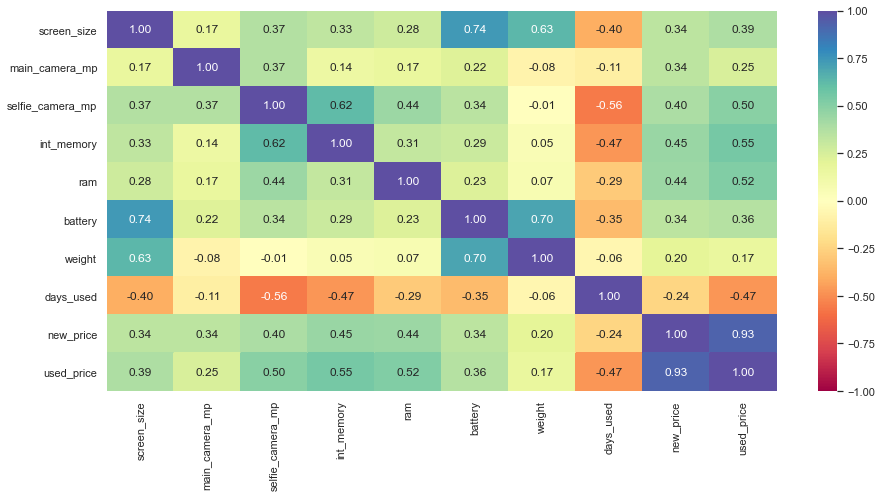

<IPython.core.display.Javascript object>

In [85]:
# Looks the same
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df_out_treat[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.savefig("heat_map.jpg", bbox_inches="tight")
plt.show()

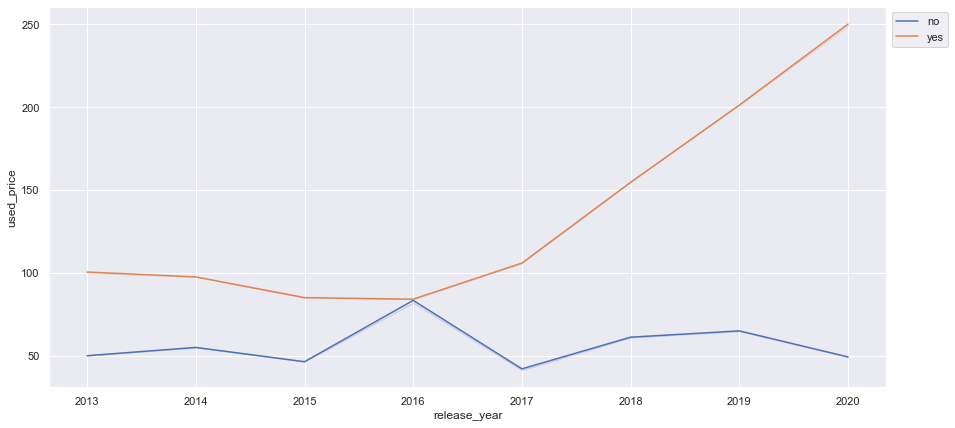

<IPython.core.display.Javascript object>

In [86]:
# Looks the same
plt.figure(figsize=(15, 7))
sns.lineplot(
    x=df_out_treat["release_year"],
    y=df_out_treat["used_price"],
    hue=df_out_treat["4g"],
    ci=0,
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.savefig("4g_year.jpg", bbox_inches="tight")
plt.show()

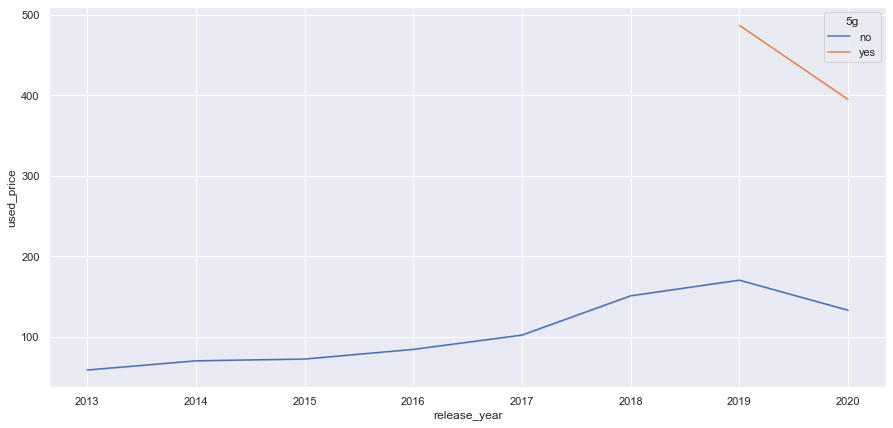

<IPython.core.display.Javascript object>

In [87]:
# Looks the same
plt.figure(figsize=(15, 7))
sns.lineplot(
    x=df_out_treat["release_year"],
    y=df_out_treat["used_price"],
    hue=df_out_treat["5g"],
    ci=0,
)
plt.savefig("5g_year.jpg", bbox_inches="tight")
plt.show()

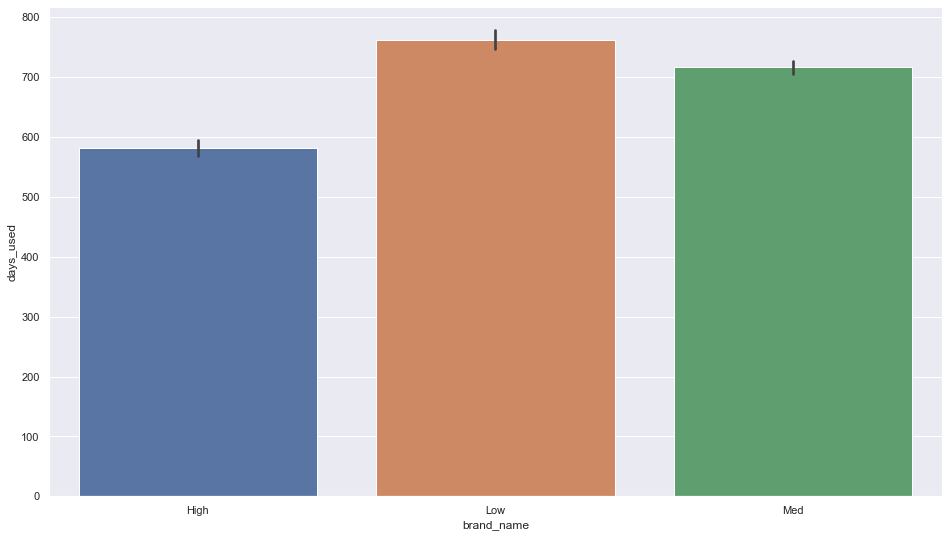

<IPython.core.display.Javascript object>

In [88]:
#Much easier to see versus spread out between 34 values
#plt.figure(figsize=(24, 10))
sns.barplot(
    x=df_out_treat["brand_name"], y=df_out_treat["days_used"],
)
# plt.legend(bbox_to_anchor=(1.00, 1))
plt.savefig('days_used_buckets.jpg',bbox_inches='tight')
plt.show()


- Low bucket phones have the highest usage in days
- High bucket phones have the lowest usage in days

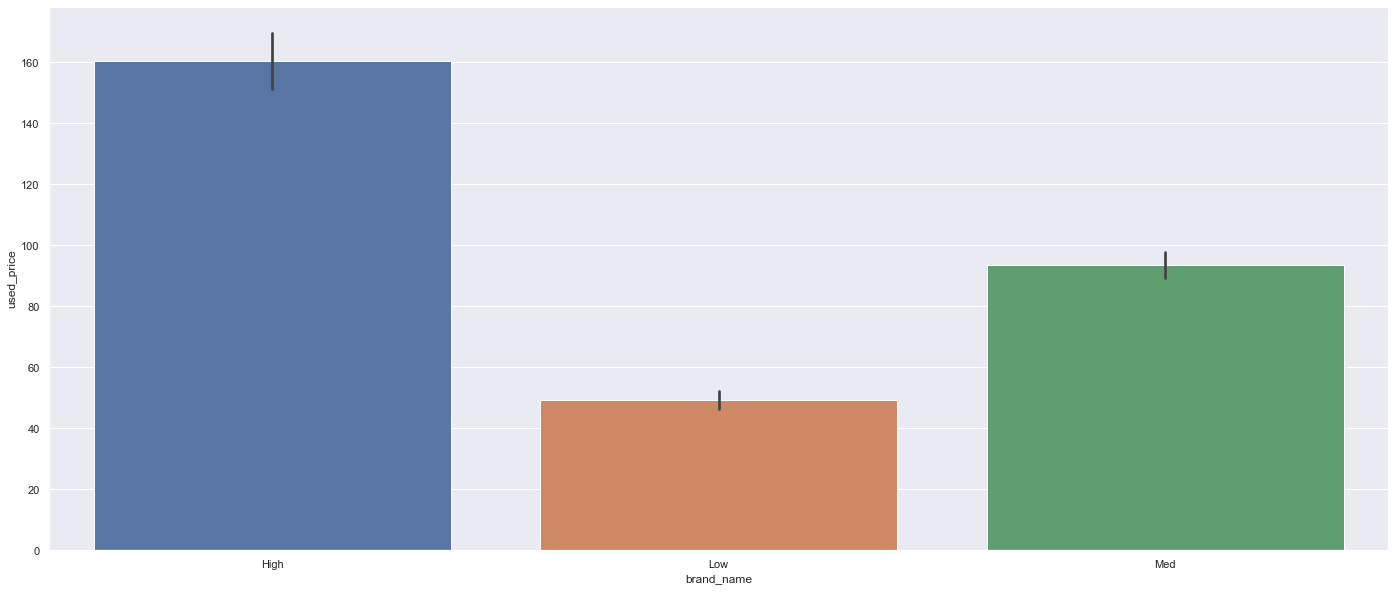

<IPython.core.display.Javascript object>

In [89]:
# Much easier to see versus spread out between 34 values
plt.figure(figsize=(24, 10))
sns.barplot(
    x=df_out_treat["brand_name"], y=df_out_treat["used_price"],
)
# plt.legend(bbox_to_anchor=(1.00, 1))
plt.savefig("used_price_bucket.jpg", bbox_inches="tight")
plt.show()

- This makes intuitive sense as the buckets are based on used price
- It's a good visual check to ensure the buckets are correct

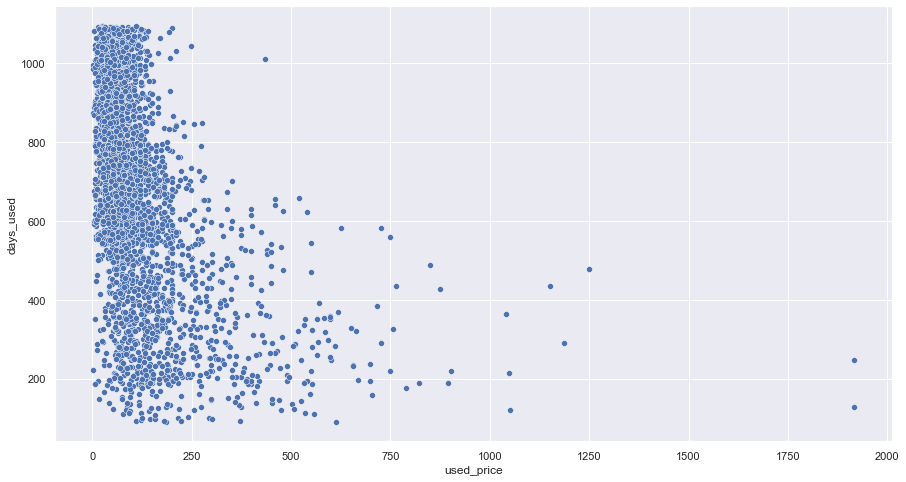

<IPython.core.display.Javascript object>

In [90]:
# No change to this plot
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x=df_out_treat["used_price"], y=df_out_treat["days_used"], ci=0.0, palette="Dark2"
)
plt.show()

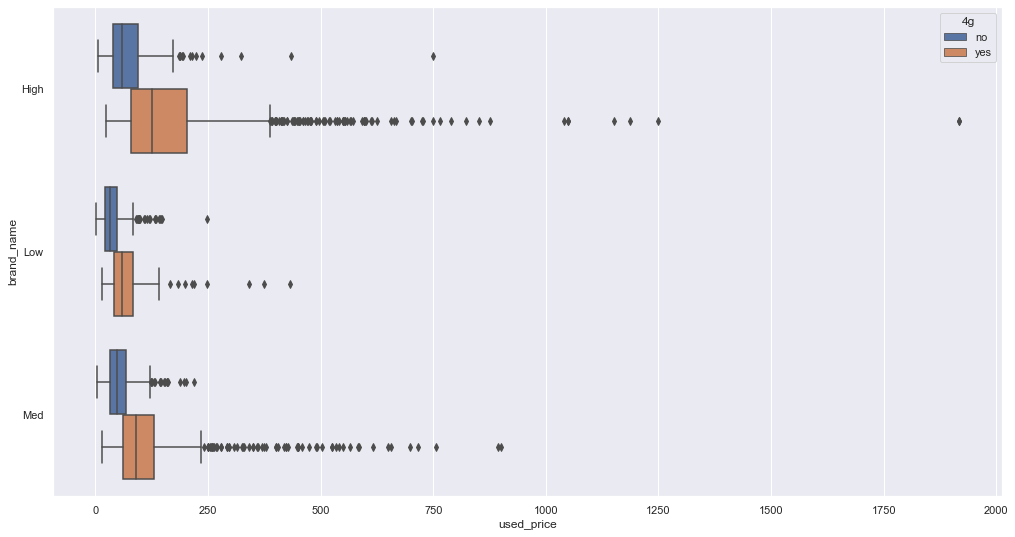

<IPython.core.display.Javascript object>

In [91]:
plt.figure(figsize=(17, 9))
sns.boxplot(y="brand_name", x="used_price", data=df_out_treat, hue="4g")
plt.show()

- Can see the right skewness of all 3 buckets in used prices
- Phones with 4g have higher prices 

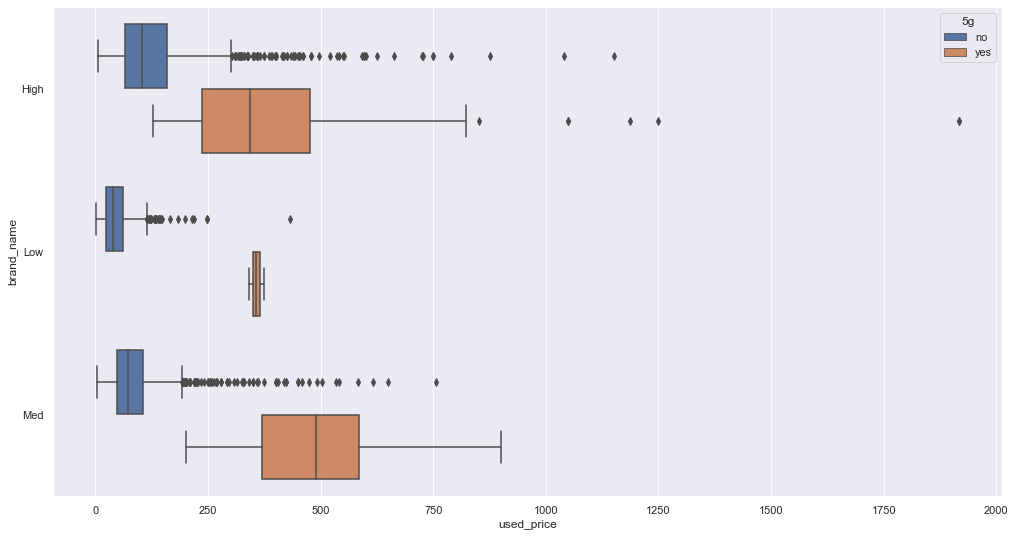

<IPython.core.display.Javascript object>

In [92]:
plt.figure(figsize=(17, 9))
sns.boxplot(y="brand_name", x="used_price", data=df_out_treat, hue="5g")
plt.show()

- There are hardly any 5g phones in the low bucket
- Medium buckets used prices are within the quartiles
- Most of the right skews are in the no 5g phones BUT most of the phones do not have 5g

## Building a Linear Regression model

- We want to predict used_price 

- First split the data into train and test, then build the linear regression model using the train data

In [93]:
# Set up X with all the data minus the value to predict and make that y
X = df_out_treat.drop(["used_price"], axis=1)
y = df_out_treat["used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0       High  Android        23.97  yes   no            13.0   
1       High  Android        28.10  yes  yes            13.0   
2       High  Android        24.29  yes  yes            13.0   
3       High  Android        26.04  yes  yes            13.0   
4       High  Android        15.72  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price  
0        127     111.62  
1        325     249.39  
2        162     359.47  
3        345     278.93  
4        293     140.87  
0     86.96
1    161.49
2    268

<IPython.core.display.Javascript object>

In [94]:
# Now to one hot encode the categorical variables left dropping the first column
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,brand_name_Low,brand_name_Med,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,23.97,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,0,0,0,0,0,1,0
1,28.10,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,0,0,0,0,0,1,1
2,24.29,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,0,0,0,0,0,1,1
3,26.04,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,0,0,0,0,0,1,1
4,15.72,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [95]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [96]:
# Check the split
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


<IPython.core.display.Javascript object>

In [97]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [98]:
# Let's see the coefficients and the Intercept
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,-0.448569
main_camera_mp,-1.910842
selfie_camera_mp,-0.375068
int_memory,0.080180
ram,3.630559
battery,-0.000049
weight,-0.017507
release_year,2.797259
days_used,-0.105458
new_price,0.537982


<IPython.core.display.Javascript object>

## Model performance evaluation

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [99]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [100]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,28.766778,17.055631,0.945356,0.944981,28.454069


<IPython.core.display.Javascript object>

In [101]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,26.116488,16.7491,0.950786,0.949992,27.297736


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 94.5%, indicating that the model explains 94.5% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used prices within a mean error of 17 euros on the test data.

- MAPE on the test set suggests we can predict within 28.5% of the used price.

** Compare the linear regression using Statsmodel...plus I like all the summary stats

In [102]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     2525.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:55:10   Log-Likelihood:                -11941.
No. Observations:                2499   AIC:                         2.392e+04
Df Residuals:                    2481   BIC:                         2.402e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5573.6089   1033.138  

<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [104]:
checking_vif(x_train1)

,feature,VIF
0,const,3.200081e+06
1,screen_size,3.074530e+00
2,main_camera_mp,1.825270e+00
3,selfie_camera_mp,2.837978e+00
4,int_memory,2.035040e+00
5,ram,1.674922e+00
6,battery,3.566486e+00
7,weight,2.992365e+00
8,release_year,4.155391e+00
9,days_used,2.571968e+00


<IPython.core.display.Javascript object>

- NO high multicollinearity on any feature except const, everthing else is low 

**The above predictors have no multicollinearity and the assumption is satisfied.**

Let's check the model performance.

In [105]:
# No changes since I didn't need to remove any data
# Note the first two times I ran this I had VERY high multicollinearity, I had to adjust the brand buckets
olsmod1 = sm.OLS(y_train, x_train1).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     2525.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:55:10   Log-Likelihood:                -11941.
No. Observations:                2499   AIC:                         2.392e+04
Df Residuals:                    2481   BIC:                         2.402e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5573.6089   1033.138  

<IPython.core.display.Javascript object>

- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.


- *battery*, *weight*, *os_Others*, *os_Windows* have p-value > 0.05. So, they are not significant and we'll drop them.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [106]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'weight', 'release_year', 'days_used', 'new_price', 'brand_name_Low', 'brand_name_Med', 'os_iOS', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [107]:
# Create x train/test with the selected features taking out the high p values features
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

<IPython.core.display.Javascript object>

In [108]:
# Re-run model with train2 features
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     3068.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:55:10   Log-Likelihood:                -11941.
No. Observations:                2499   AIC:                         2.391e+04
Df Residuals:                    2484   BIC:                         2.400e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5580.8264   1016.644  

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train2* as the final ones and *olsmod2* as final model.**

**Observations**

* Now adjusted R-squared is 0.945, i.e., our model is able to explain ~95% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.945. This shows that the variables we dropped were not affecting the model much.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [109]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1248,98.87,117.187051,-18.317051
2206,132.62,165.818404,-33.198404
1623,25.27,37.281945,-12.011945
2245,104.26,96.821175,7.438825
1043,39.22,46.669972,-7.449972


<IPython.core.display.Javascript object>

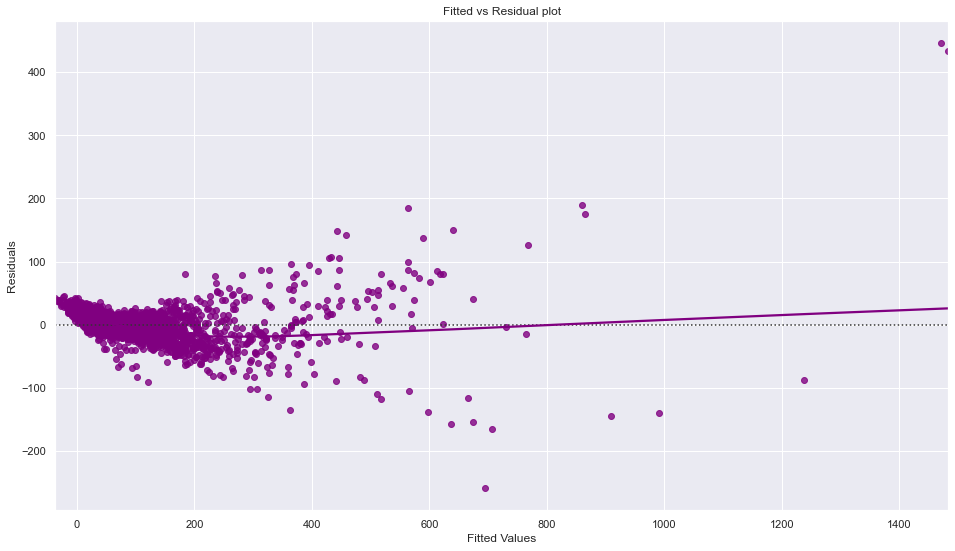

<IPython.core.display.Javascript object>

In [110]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

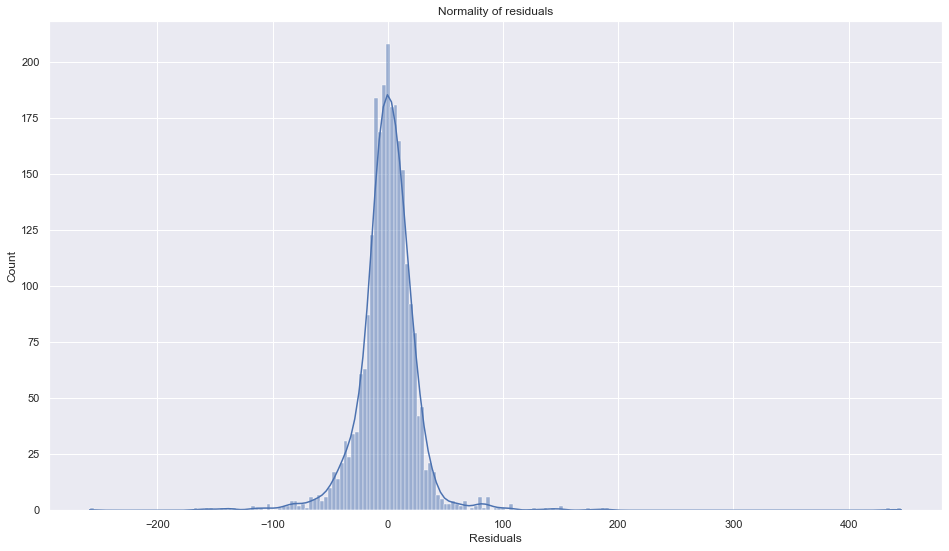

<IPython.core.display.Javascript object>

In [111]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

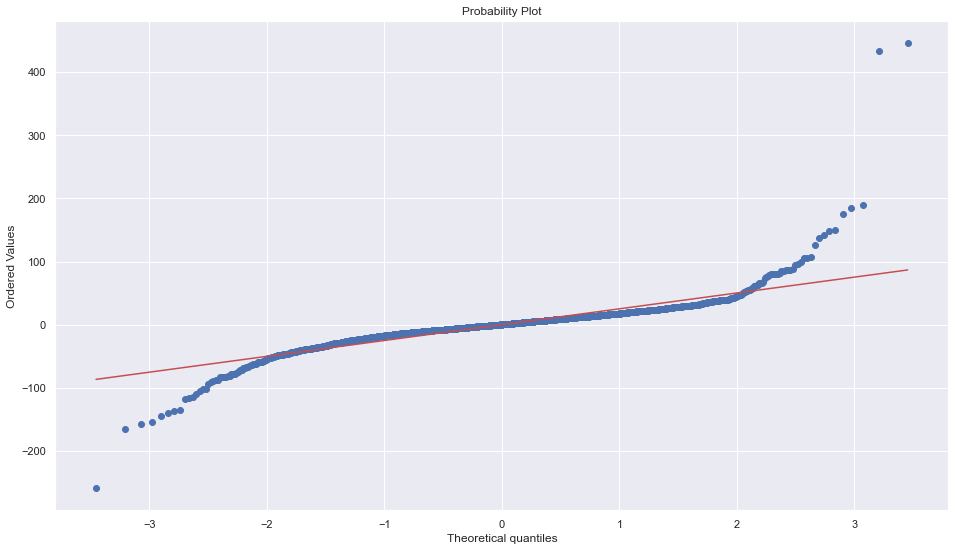

<IPython.core.display.Javascript object>

In [112]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [113]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.7629704475402832, pvalue=0.0)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [114]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 0.868214754167354), ('p-value', 0.9934499878858548)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

## Final Model Summary

In [115]:
# predictions on the test set
pred = olsmod2.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
255,194.45,184.472747
1398,170.24,165.471653
2253,164.76,229.640298
579,39.09,47.252250
3123,45.08,28.960488
1959,51.05,50.038986
3111,40.07,19.198417
1456,54.75,44.954575
3332,95.06,107.101684
855,44.03,40.650534


<IPython.core.display.Javascript object>

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

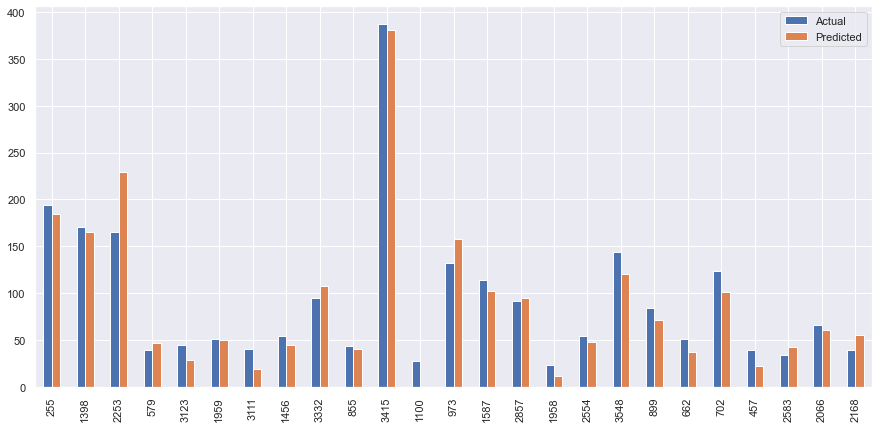

<IPython.core.display.Javascript object>

In [116]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [117]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,28.773333,17.056133,0.945331,0.945001,28.43358


<IPython.core.display.Javascript object>

In [118]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,26.127795,16.757375,0.950743,0.950044,27.299479


<IPython.core.display.Javascript object>

* The model is able to explain ~95% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 28% of the used price. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [119]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,28.766778,28.773333
MAE,17.055631,17.056133
R-squared,0.945356,0.945331
Adj. R-squared,0.944981,0.945001
MAPE,28.454069,28.433580


<IPython.core.display.Javascript object>

- Pretty much the same values, only decimal place difference

In [120]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,26.116488,26.127795
MAE,16.749100,16.757375
R-squared,0.950786,0.950743
Adj. R-squared,0.949992,0.950044
MAPE,27.297736,27.299479


<IPython.core.display.Javascript object>

* The performance of the two models is close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

In [121]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     3068.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:55:11   Log-Likelihood:                -11941.
No. Observations:                2499   AIC:                         2.391e+04
Df Residuals:                    2484   BIC:                         2.400e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5580.8264   1016.644  

<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations

- 5g is the largest factor positively correlated with used price but 5g is new and only released in 2019
- 4g is negatively correlated with used prices, not surprising since 5g is new and most likely wanted
- Surprisingly iOs strongly negatively correlated with used prices, take away $34 if it's iOs
- Ram, internal memory, release_year, new price, brand name low, brand name med all have positive coefficients, so as they increase the used price will increase
- Days used is negatively correlated, so the less used phones will be worth more
- Main camera megapixels and screen size are negatively correlated slightly
- Weight is also negatively correlated

The best used price phone has the factors based on coefficients:
- 5g
- not iOs
- Brand name in low to medium buckets
- Higher ram, internal memory, new price
- release year recent
- Light and barely used
